In [1]:

# IMPORTANT: RUN THIS CELL IN ORDER TO IMPORT YOUR KAGGLE DATA SOURCES
# TO THE CORRECT LOCATION (/kaggle/input) IN YOUR NOTEBOOK,
# THEN FEEL FREE TO DELETE THIS CELL.
# NOTE: THIS NOTEBOOK ENVIRONMENT DIFFERS FROM KAGGLE'S PYTHON
# ENVIRONMENT SO THERE MAY BE MISSING LIBRARIES USED BY YOUR
# NOTEBOOK.

import os
import sys
from tempfile import NamedTemporaryFile
from urllib.request import urlopen
from urllib.parse import unquote, urlparse
from urllib.error import HTTPError
from zipfile import ZipFile
import tarfile
import shutil
# Going to use these 5 base models for the stacking
from sklearn.ensemble import (RandomForestClassifier, AdaBoostClassifier, 
                              GradientBoostingClassifier, ExtraTreesClassifier)
from sklearn.svm import SVC
'''
CHUNK_SIZE = 40960
DATA_SOURCE_MAPPING = 'malicious-urls-dataset:https%3A%2F%2Fstorage.googleapis.com%2Fkaggle-data-sets%2F1486586%2F2456026%2Fbundle%2Farchive.zip%3FX-Goog-Algorithm%3DGOOG4-RSA-SHA256%26X-Goog-Credential%3Dgcp-kaggle-com%2540kaggle-161607.iam.gserviceaccount.com%252F20240608%252Fauto%252Fstorage%252Fgoog4_request%26X-Goog-Date%3D20240608T044022Z%26X-Goog-Expires%3D259200%26X-Goog-SignedHeaders%3Dhost%26X-Goog-Signature%3D5d7598b150658e7dd4ce308c927413193dca88a01009ae19491817639ec3a9cfd06ba1ffc4f6bad2e60cb67eb5c47c65dec2291ac0bfc3be17927f8b36f9caf49ab5f1b60f7405cc07e3ca8ed0011ad68d27b086e95238be835114d4b90c4937a252b6428d300821984645de9a3d99c2f45a533661f27e8b3415994fae695a70728a2c2981a15524d536b592db133972cf66247ee29b4bf32b744a338e13ec16482e6d4248cda708e728411dc9a4ccdbea46a73336f172c189371e7edf10fe71956cacefd0280977fd5f915715b615a7b4a32664b44bf55ad471831e41de6d238d92dba97d6427b5b0bcfc1638e54186bc4205ab292756a790829579328311a4'

KAGGLE_INPUT_PATH='/kaggle/input'
KAGGLE_WORKING_PATH='/kaggle/working'
KAGGLE_SYMLINK='kaggle'

!umount /kaggle/input/ 2> /dev/null
shutil.rmtree('/kaggle/input', ignore_errors=True)
os.makedirs(KAGGLE_INPUT_PATH, 0o777, exist_ok=True)
os.makedirs(KAGGLE_WORKING_PATH, 0o777, exist_ok=True)

try:
  os.symlink(KAGGLE_INPUT_PATH, os.path.join("..", 'input'), target_is_directory=True)
except FileExistsError:
  pass
try:
  os.symlink(KAGGLE_WORKING_PATH, os.path.join("..", 'working'), target_is_directory=True)
except FileExistsError:
  pass

for data_source_mapping in DATA_SOURCE_MAPPING.split(','):
    directory, download_url_encoded = data_source_mapping.split(':')
    download_url = unquote(download_url_encoded)
    filename = urlparse(download_url).path
    destination_path = os.path.join(KAGGLE_INPUT_PATH, directory)
    try:
        with urlopen(download_url) as fileres, NamedTemporaryFile() as tfile:
            total_length = fileres.headers['content-length']
            print(f'Downloading {directory}, {total_length} bytes compressed')
            dl = 0
            data = fileres.read(CHUNK_SIZE)
            while len(data) > 0:
                dl += len(data)
                tfile.write(data)
                done = int(50 * dl / int(total_length))
                sys.stdout.write(f"\r[{'=' * done}{' ' * (50-done)}] {dl} bytes downloaded")
                sys.stdout.flush()
                data = fileres.read(CHUNK_SIZE)
            if filename.endswith('.zip'):
              with ZipFile(tfile) as zfile:
                zfile.extractall(destination_path)
            else:
              with tarfile.open(tfile.name) as tarfile:
                tarfile.extractall(destination_path)
            print(f'\nDownloaded and uncompressed: {directory}')
    except HTTPError as e:
        print(f'Failed to load (likely expired) {download_url} to path {destination_path}')
        continue
    except OSError as e:
        print(f'Failed to load {download_url} to path {destination_path}')
        continue

print('Data source import complete.')
'''

'\nCHUNK_SIZE = 40960\nDATA_SOURCE_MAPPING = \'malicious-urls-dataset:https%3A%2F%2Fstorage.googleapis.com%2Fkaggle-data-sets%2F1486586%2F2456026%2Fbundle%2Farchive.zip%3FX-Goog-Algorithm%3DGOOG4-RSA-SHA256%26X-Goog-Credential%3Dgcp-kaggle-com%2540kaggle-161607.iam.gserviceaccount.com%252F20240608%252Fauto%252Fstorage%252Fgoog4_request%26X-Goog-Date%3D20240608T044022Z%26X-Goog-Expires%3D259200%26X-Goog-SignedHeaders%3Dhost%26X-Goog-Signature%3D5d7598b150658e7dd4ce308c927413193dca88a01009ae19491817639ec3a9cfd06ba1ffc4f6bad2e60cb67eb5c47c65dec2291ac0bfc3be17927f8b36f9caf49ab5f1b60f7405cc07e3ca8ed0011ad68d27b086e95238be835114d4b90c4937a252b6428d300821984645de9a3d99c2f45a533661f27e8b3415994fae695a70728a2c2981a15524d536b592db133972cf66247ee29b4bf32b744a338e13ec16482e6d4248cda708e728411dc9a4ccdbea46a73336f172c189371e7edf10fe71956cacefd0280977fd5f915715b615a7b4a32664b44bf55ad471831e41de6d238d92dba97d6427b5b0bcfc1638e54186bc4205ab292756a790829579328311a4\'\n\nKAGGLE_INPUT_PATH=\'/kaggle/input\

In [2]:
!pip install python-whois

In [3]:
pip install lightgbm

Note: you may need to restart the kernel to use updated packages.


In [4]:
import pandas as pd
import itertools
from sklearn.metrics import mean_squared_error,confusion_matrix, precision_score, recall_score, auc,roc_curve
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np
import random
import math
from collections import Counter
from sklearn import metrics
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
import xgboost as xgb
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.ensemble import AdaBoostClassifier
import os
import socket
import whois
from datetime import datetime
import time
from bs4 import BeautifulSoup
import urllib
import bs4
import os
import seaborn as sns
import sys
import tarfile
import shutil

'''
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))
'''

"\nfor dirname, _, filenames in os.walk('/kaggle/input'):\n    for filename in filenames:\n        print(os.path.join(dirname, filename))\n"

In [5]:
'''
from google.colab import drive
 drive.mount('/content/drive')

 import os
 print(os.listdir('/content/drive/MyDrive/Colab Notebooks/malicious URL dataset'))

# import os
# print(os.listdir('/kaggle/input/'))

# Define the file path
 file_path = '/content/drive/MyDrive/Colab Notebooks/malicious URL dataset/malicious_phish.csv'
'''

import os
print(os.listdir('C:/Users/wku/Desktop/project/dataset/'))

# Define the file path
file_path = 'C:/Users/wku/Desktop/project/dataset/malicious_phish.csv'

# Load the dataset into a Pandas DataFrame
df = pd.read_csv(file_path)

print(df.shape)
df.head()

['malicious_phish.csv']
(651191, 2)


,url,type
0,br-icloud.com.br,phishing
1,mp3raid.com/music/krizz_kaliko.html,benign
2,bopsecrets.org/rexroth/cr/1.htm,benign
3,http://www.garage-pirenne.be/index.php?option=...,defacement
4,http://adventure-nicaragua.net/index.php?optio...,defacement


In [6]:
# Count the number of values for each 'type'
type_counts = df.type.value_counts()
df.type.value_counts()

type
benign        428103
defacement     96457
phishing       94111
malware        32520
Name: count, dtype: int64

# Feature Engineering

In [7]:
import re
#Use of IP or not in domain
def having_ip_address(url):
    match = re.search(
        '(([01]?\\d\\d?|2[0-4]\\d|25[0-5])\\.([01]?\\d\\d?|2[0-4]\\d|25[0-5])\\.([01]?\\d\\d?|2[0-4]\\d|25[0-5])\\.'
        '([01]?\\d\\d?|2[0-4]\\d|25[0-5])\\/)|'  # IPv4
        '((0x[0-9a-fA-F]{1,2})\\.(0x[0-9a-fA-F]{1,2})\\.(0x[0-9a-fA-F]{1,2})\\.(0x[0-9a-fA-F]{1,2})\\/)' # IPv4 in hexadecimal
        '(?:[a-fA-F0-9]{1,4}:){7}[a-fA-F0-9]{1,4}', url)  # Ipv6
    if match:
        # print match.group()
        return 1
    else:
        # print 'No matching pattern found'
        return 0
df['use_of_ip'] = df['url'].apply(lambda i: having_ip_address(i))
# df['use_of_ip'] = df['use_of_ip'].astype(str)

In [8]:
from sklearn.preprocessing import LabelEncoder

lb_make = LabelEncoder()
df["type_code"] = lb_make.fit_transform(df["type"])
df["type_code"].value_counts()

type_code
0    428103
1     96457
3     94111
2     32520
Name: count, dtype: int64

In [9]:
from urllib.parse import urlparse




def abnormal_url(url):
    hostname = urlparse(url).hostname
    hostname = str(hostname)
    match = re.search(hostname, url)
    if match:
        # print match.group()
        return 1
    else:
        # print 'No matching pattern found'
        return 0


df['abnormal_url'] = df['url'].apply(lambda i: abnormal_url(i))

In [10]:
!pip install googlesearch-python

In [11]:
df['count.'] = df['url'].apply(lambda i: i.count('.'))
df.head()

,url,type,use_of_ip,type_code,abnormal_url,count.
0,br-icloud.com.br,phishing,0,3,0,2
1,mp3raid.com/music/krizz_kaliko.html,benign,0,0,0,2
2,bopsecrets.org/rexroth/cr/1.htm,benign,0,0,0,2
3,http://www.garage-pirenne.be/index.php?option=...,defacement,0,1,1,3
4,http://adventure-nicaragua.net/index.php?optio...,defacement,0,1,1,2


In [12]:
df['count-www'] = df['url'].apply(lambda i: i.count('www'))
df['count@'] = df['url'].apply(lambda i: i.count('@'))
from urllib.parse import urlparse
def no_of_dir(url):
    urldir = urlparse(url).path
    return urldir.count('/')
df['count_dir'] = df['url'].apply(lambda i: no_of_dir(i))
def no_of_embed(url):
    urldir = urlparse(url).path
    return urldir.count('//')
df['count_embed_domian'] = df['url'].apply(lambda i: no_of_embed(i))
def shortening_service(url):
    match = re.search('bit\.ly|goo\.gl|shorte\.st|go2l\.ink|x\.co|ow\.ly|t\.co|tinyurl|tr\.im|is\.gd|cli\.gs|'
                      'yfrog\.com|migre\.me|ff\.im|tiny\.cc|url4\.eu|twit\.ac|su\.pr|twurl\.nl|snipurl\.com|'
                      'short\.to|BudURL\.com|ping\.fm|post\.ly|Just\.as|bkite\.com|snipr\.com|fic\.kr|loopt\.us|'
                      'doiop\.com|short\.ie|kl\.am|wp\.me|rubyurl\.com|om\.ly|to\.ly|bit\.do|t\.co|lnkd\.in|'
                      'db\.tt|qr\.ae|adf\.ly|goo\.gl|bitly\.com|cur\.lv|tinyurl\.com|ow\.ly|bit\.ly|ity\.im|'
                      'q\.gs|is\.gd|po\.st|bc\.vc|twitthis\.com|u\.to|j\.mp|buzurl\.com|cutt\.us|u\.bb|yourls\.org|'
                      'x\.co|prettylinkpro\.com|scrnch\.me|filoops\.info|vzturl\.com|qr\.net|1url\.com|tweez\.me|v\.gd|'
                      'tr\.im|link\.zip\.net',
                      url)
    if match:
        return 1
    else:
        return 0
df['short_url'] = df['url'].apply(lambda i: shortening_service(i))
# df['short_url'] = df['short_url'].astype(str)

In [13]:
df['count-https'] = df['url'].apply(lambda i : i.count('https'))
# df['count-https'] = df['count-https'].astype(str)
df['count-http'] = df['url'].apply(lambda i : i.count('http'))

In [14]:
df['count%'] = df['url'].apply(lambda i: i.count('%'))
df['count?'] = df['url'].apply(lambda i: i.count('?'))
df['count-'] = df['url'].apply(lambda i: i.count('-'))
df['count='] = df['url'].apply(lambda i: i.count('='))
#Length of URL
df['url_length'] = df['url'].apply(lambda i: len(str(i)))
#Hostname Length
df['hostname_length'] = df['url'].apply(lambda i: len(urlparse(i).netloc))

df.head()

,url,type,use_of_ip,type_code,abnormal_url,count.,count-www,count@,count_dir,count_embed_domian,short_url,count-https,count-http,count%,count?,count-,count=,url_length,hostname_length
0,br-icloud.com.br,phishing,0,3,0,2,0,0,0,0,0,0,0,0,0,1,0,16,0
1,mp3raid.com/music/krizz_kaliko.html,benign,0,0,0,2,0,0,2,0,0,0,0,0,0,0,0,35,0
2,bopsecrets.org/rexroth/cr/1.htm,benign,0,0,0,2,0,0,3,0,0,0,0,0,0,0,0,31,0
3,http://www.garage-pirenne.be/index.php?option=...,defacement,0,1,1,3,1,0,1,0,0,0,1,0,1,1,4,88,21
4,http://adventure-nicaragua.net/index.php?optio...,defacement,0,1,1,2,0,0,1,0,0,0,1,0,1,1,3,235,23


In [15]:
def suspicious_words(url):
    match = re.search('PayPal|login|signin|bank|account|update|free|lucky|service|bonus|ebayisapi|webscr',
                      url)
    if match:
        return 1
    else:
        return 0
df['sus_url'] = df['url'].apply(lambda i: suspicious_words(i))

In [16]:
df.head()

,url,type,use_of_ip,type_code,abnormal_url,count.,count-www,count@,count_dir,count_embed_domian,short_url,count-https,count-http,count%,count?,count-,count=,url_length,hostname_length,sus_url
0,br-icloud.com.br,phishing,0,3,0,2,0,0,0,0,0,0,0,0,0,1,0,16,0,0
1,mp3raid.com/music/krizz_kaliko.html,benign,0,0,0,2,0,0,2,0,0,0,0,0,0,0,0,35,0,0
2,bopsecrets.org/rexroth/cr/1.htm,benign,0,0,0,2,0,0,3,0,0,0,0,0,0,0,0,31,0,0
3,http://www.garage-pirenne.be/index.php?option=...,defacement,0,1,1,3,1,0,1,0,0,0,1,0,1,1,4,88,21,0
4,http://adventure-nicaragua.net/index.php?optio...,defacement,0,1,1,2,0,0,1,0,0,0,1,0,1,1,3,235,23,0


In [17]:

!pip install tld

In [18]:
#Importing dependencies
from urllib.parse import urlparse
from tld import get_tld
import os.path

#First Directory Length
def fd_length(url):
    urlpath= urlparse(url).path
    try:
        return len(urlpath.split('/')[1])
    except:
        return 0

df['fd_length'] = df['url'].apply(lambda i: fd_length(i))

#Length of Top Level Domain
df['tld'] = df['url'].apply(lambda i: get_tld(i,fail_silently=True))
def tld_length(tld):
    try:
        return len(tld)
    except:
        return -1

df['tld_length'] = df['tld'].apply(lambda i: tld_length(i))

In [19]:
def digit_count(url):
    digits = 0
    for i in url:
        if i.isnumeric():
            digits = digits + 1
    return digits
df['count-digits']= df['url'].apply(lambda i: digit_count(i))

In [20]:
def letter_count(url):
    letters = 0
    for i in url:
        if i.isalpha():
            letters = letters + 1
    return letters
df['count-letters']= df['url'].apply(lambda i: letter_count(i))

In [21]:
df = df.drop(columns="tld")

In [22]:
'''
from sklearn.preprocessing import LabelEncoder

lb_make = LabelEncoder()
df["type_code"] = lb_make.fit_transform(df["type"])
df["type_code"].value_counts()
'''

'\nfrom sklearn.preprocessing import LabelEncoder\n\nlb_make = LabelEncoder()\ndf["type_code"] = lb_make.fit_transform(df["type"])\ndf["type_code"].value_counts()\n'

In [23]:
#Predictor Variables
X = df[['use_of_ip','abnormal_url', 'count.', 'count-www', 'count@',
       'count_dir', 'count_embed_domian', 'short_url', 'count-https',
       'count-http', 'count%', 'count?', 'count-', 'count=', 'url_length',
       'hostname_length', 'sus_url', 'fd_length', 'tld_length', 'count-digits',
       'count-letters']]

#Target Variable
y = df['type_code']

In [24]:
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2,shuffle=True, random_state=5)

In [25]:
print(X_train.shape)

(520952, 21)


In [26]:
print(X_test.shape)

(130239, 21)


In [27]:
print(y_train.shape)

(520952,)


In [28]:
print(y_test.shape)

(130239,)


# Before Hyperparameters tuning

## LGBMClassifier

In [29]:
# lgb = LGBMClassifier(objective='multiclass',boosting_type= 'gbdt',n_jobs = 5,
#          silent = True, random_state=5)
import time

# Initialize and start the timer for model training
start_time_lgb = time.time()
lgb = LGBMClassifier( )
LGB_C = lgb.fit(X_train, y_train)

# Calculate the model training time
training_time_lgbm = time.time() - start_time_lgb

y_pred_train = LGB_C.predict(X_train)
# Initialize and start the timer for model execution
start_time = time.time()
y_pred = LGB_C.predict(X_test)
# Calculate the model execution time
execution_time_lgbm = ( time.time() - start_time ) / 130239

print(classification_report(y_test,y_pred))

score = metrics.accuracy_score(y_test, y_pred)
print("accuracy:   %0.3f" % score)

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.012982 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1165
[LightGBM] [Info] Number of data points in the train set: 520952, number of used features: 21
[LightGBM] [Info] Start training from score -0.419439
[LightGBM] [Info] Start training from score -1.909712
[LightGBM] [Info] Start training from score -2.996946
[LightGBM] [Info] Start training from score -1.934324
              precision    recall  f1-score   support

           0       0.97      0.99      0.98     85621
           1       0.96      0.99      0.98     19292
           2       0.97      0.91      0.94      6504
           3       0.90      0.83      0.86     18822

    accuracy                           0.96    130239
   macro avg       0.95      0.93      0.94    130239
weighted avg       0.96      0.96      0.96    130

In [30]:
lgb_train=LGB_C.predict(X_train)
lgb_test=LGB_C.predict(X_test)

In [31]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    See full source and example:
    http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html

    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Confusion matrix, without normalization


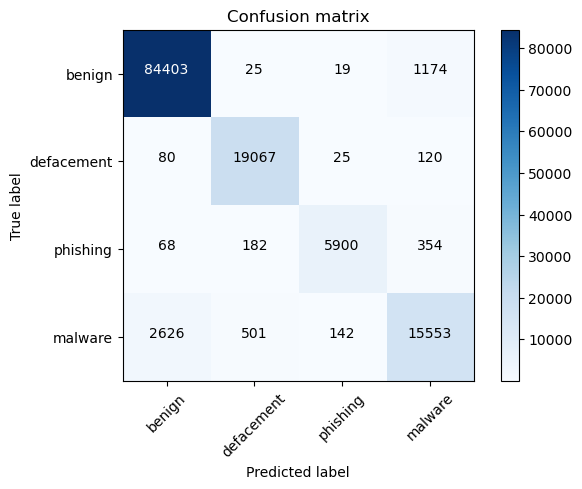

In [32]:
cm = metrics.confusion_matrix(y_test, y_pred, labels=[0,1,2,3])
plot_confusion_matrix(cm,classes=['benign', 'defacement','malware','phishing'])

In [33]:
lgb_feature = lgb.feature_importances_
lgb_feature

array([  30,   60,  996,  515,   75, 1154,   50,  153,  242,  123,  262,
        217,  612,  393, 1048, 1441,  231, 1784,  625, 1163,  826])

In [34]:
lgb_features = lgb_feature.tolist()

# Hyper Parameters tuning

In [35]:
pip install optuna

Note: you may need to restart the kernel to use updated packages.


In [36]:
'''
import optuna
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

def objective(trial):
    # Number of trees in random forest
    
    n_estimators = trial.suggest_int(name="n_estimators", low=100, high=500, step=100)

    # Number of features to consider at every split
    max_features = trial.suggest_categorical(name="max_features", choices=['auto', 'sqrt'])

    # Maximum number of levels in tree
    max_depth = trial.suggest_int(name="max_depth", low=10, high=110, step=20)

    # Minimum number of samples required to split a node
    min_samples_split = trial.suggest_int(name="min_samples_split", low=2, high=10, step=2)

    # Minimum number of samples required at each leaf node
    min_samples_leaf = trial.suggest_int(name="min_samples_leaf", low=1, high=4, step=1)

    
    # Random state
    random_state = trial.suggest_int(name="random_state", low=0, high=100, step=1)
    
    params = {
        "n_estimators": n_estimators,
        "max_features": max_features,
        "max_depth": max_depth,
        "min_samples_split": min_samples_split,
        "min_samples_leaf": min_samples_leaf,
        "random_state": random_state
    }
    

    params = {
        "random_state": random_state
    }
    model = RandomForestClassifier(**params)
    model.fit(X_train, y_train)
    predictions = model.predict(X_test)
    # Calculate the accuracy of the model
    accuracy = accuracy_score(y_test, predictions)
    return accuracy

study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=30)

print('Best hyperparameters:', study.best_params)
print('Best Accuracy:', study.best_value)
'''

'\nimport optuna\nfrom sklearn.ensemble import RandomForestClassifier\nfrom sklearn.metrics import accuracy_score\n\ndef objective(trial):\n    # Number of trees in random forest\n    \n    n_estimators = trial.suggest_int(name="n_estimators", low=100, high=500, step=100)\n\n    # Number of features to consider at every split\n    max_features = trial.suggest_categorical(name="max_features", choices=[\'auto\', \'sqrt\'])\n\n    # Maximum number of levels in tree\n    max_depth = trial.suggest_int(name="max_depth", low=10, high=110, step=20)\n\n    # Minimum number of samples required to split a node\n    min_samples_split = trial.suggest_int(name="min_samples_split", low=2, high=10, step=2)\n\n    # Minimum number of samples required at each leaf node\n    min_samples_leaf = trial.suggest_int(name="min_samples_leaf", low=1, high=4, step=1)\n\n    \n    # Random state\n    random_state = trial.suggest_int(name="random_state", low=0, high=100, step=1)\n    \n    params = {\n        "n_es

## SGD Classifier

In [37]:
# Initialize and start the timer for model training
start_time_sgd = time.time()

# Initialize and train the SGDClassifier
sgd_classifier = SGDClassifier( )
sgd_classifier.fit(X_train, y_train)

# Calculate the model training time
training_time_sgd = time.time() - start_time_sgd

# Initialize and start the timer for model execution
start_time = time.time()

# Predict the labels for the testing set
y_pred_sgd = sgd_classifier.predict(X_test)

# Calculate the model execution time
execution_time_sgd = ( time.time() - start_time ) / 130239

print(classification_report(y_test, y_pred_sgd))

score = metrics.accuracy_score(y_test, y_pred_sgd)
print("accuracy:   %0.3f" % score)

              precision    recall  f1-score   support

           0       0.89      0.97      0.93     85621
           1       0.79      0.95      0.86     19292
           2       0.77      0.72      0.75      6504
           3       0.83      0.30      0.44     18822

    accuracy                           0.86    130239
   macro avg       0.82      0.74      0.74    130239
weighted avg       0.86      0.86      0.84    130239

accuracy:   0.860


## Extra_trees_classifier

In [38]:
# Initialize and start the timer for model training
start_time_et = time.time()

# Initialize and train the ExtraTreesClassifier
extra_trees_classifier = ExtraTreesClassifier( )
extra_trees_classifier.fit(X_train, y_train)

# Calculate the model training time
training_time_et = time.time() - start_time_et

# Initialize and start the timer for model execution
start_time = time.time()

# Predict the labels for the testing set
y_pred_extra_trees = extra_trees_classifier.predict(X_test)

# Calculate the model execution time
execution_time_et = ( time.time() - start_time ) / 130239

print(classification_report(y_test, y_pred_extra_trees))

score = metrics.accuracy_score(y_test, y_pred_extra_trees)
print("accuracy:   %0.3f" % score)

              precision    recall  f1-score   support

           0       0.97      0.99      0.98     85621
           1       0.98      0.99      0.99     19292
           2       0.98      0.95      0.97      6504
           3       0.91      0.86      0.88     18822

    accuracy                           0.97    130239
   macro avg       0.96      0.94      0.95    130239
weighted avg       0.96      0.97      0.97    130239

accuracy:   0.966


Confusion matrix, without normalization


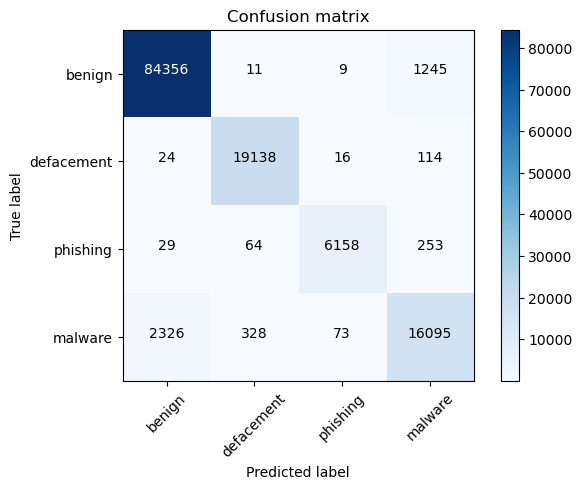

In [39]:
CM_Extra=confusion_matrix(y_test, y_pred_extra_trees ,labels=[0,1,2,3])

plot_confusion_matrix(CM_Extra, classes=['benign', 'defacement','phishing','malware'])

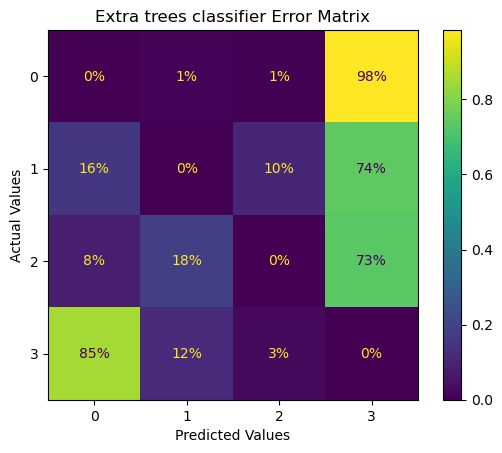

In [40]:
from sklearn.metrics import ConfusionMatrixDisplay
sample_weight = (y_pred_extra_trees != y_test)
ConfusionMatrixDisplay.from_predictions(y_test, y_pred_extra_trees, sample_weight=sample_weight, normalize="true", values_format=".0%")
plt.title('Extra trees classifier Error Matrix')
plt.ylabel('Actual Values')
plt.xlabel('Predicted Values')
# Save the plot as a PDF
plt.savefig('Extra trees classifier Error Matrix.pdf', format='pdf')
plt.show()

In [41]:
et_feature = extra_trees_classifier.feature_importances_
et_features = et_feature.tolist()

## Random Forest Classifier

In [42]:
# Initialize and start the timer for model training
start_time_rf = time.time()

rf = RandomForestClassifier( )
rf.fit(X_train, y_train)

# Calculate the model training time
training_time_rf = time.time() - start_time_rf

y_pred_train_RF = rf.predict(X_train)

# Initialize and start the timer for model execution
start_time = time.time()

y_pred_RF = rf.predict(X_test)

# Calculate the model execution time
execution_time_rf = ( time.time() - start_time ) / 130239

print(classification_report(y_test,y_pred_RF))

score = metrics.accuracy_score(y_test, y_pred_RF)
print("accuracy:   %0.3f" % score)

              precision    recall  f1-score   support

           0       0.97      0.98      0.98     85621
           1       0.98      0.99      0.99     19292
           2       0.99      0.94      0.97      6504
           3       0.91      0.86      0.88     18822

    accuracy                           0.97    130239
   macro avg       0.96      0.95      0.95    130239
weighted avg       0.97      0.97      0.97    130239

accuracy:   0.966


In [43]:
rf_train=rf.predict(X_train)
rf_test=rf.predict(X_test)

Confusion matrix, without normalization


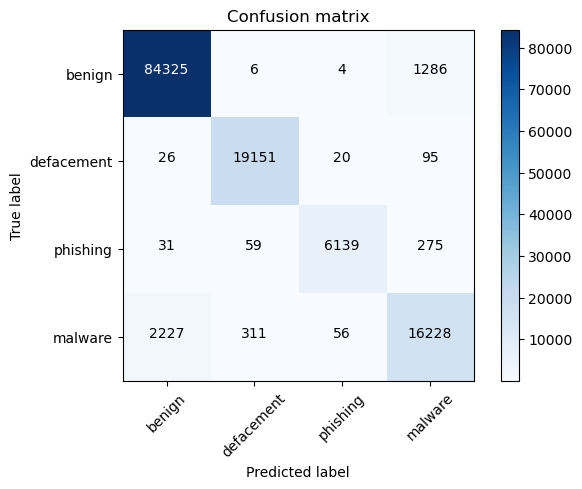

In [44]:
CM_RF=confusion_matrix(y_test,y_pred_RF,labels=[0,1,2,3])

plot_confusion_matrix(CM_RF,classes=['benign', 'defacement','phishing','malware'])

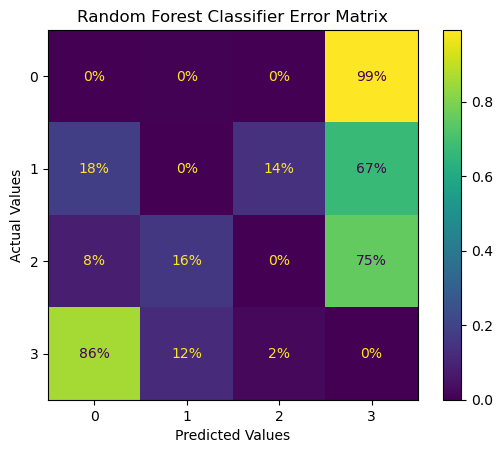

In [45]:
from sklearn.metrics import ConfusionMatrixDisplay
sample_weight = (y_pred_RF != y_test)
ConfusionMatrixDisplay.from_predictions(y_test, y_pred_RF, sample_weight=sample_weight, normalize="true", values_format=".0%")
plt.title('Random Forest Classifier Error Matrix')
plt.ylabel('Actual Values')
plt.xlabel('Predicted Values')
# Save the plot as a PDF
plt.savefig('Random Forest Classifier Error Matrix.pdf', format='pdf')
plt.show()

In [46]:
rf_feature = rf.feature_importances_
rf_features = rf_feature.tolist()

## XGB Classifier

In [47]:
# Initialize and start the timer for model training
start_time_xgb = time.time()

model_xgb = xgb.XGBClassifier( )
model_xgb.fit(X_train,y_train)

# Calculate the model training time
training_time_xgb = time.time() - start_time_xgb

# Initialize and start the timer for model execution
start_time = time.time()

y_pred_xgb = model_xgb.predict(X_test)

# Calculate the model execution time
execution_time_xgb = ( time.time() - start_time ) / 130239

print(classification_report(y_test,y_pred_xgb))

score = metrics.accuracy_score(y_test, y_pred_xgb)
print("accuracy:   %0.3f" % score)

              precision    recall  f1-score   support

           0       0.97      0.99      0.98     85621
           1       0.97      0.99      0.98     19292
           2       0.98      0.91      0.94      6504
           3       0.91      0.83      0.87     18822

    accuracy                           0.96    130239
   macro avg       0.96      0.93      0.94    130239
weighted avg       0.96      0.96      0.96    130239

accuracy:   0.962


In [48]:
model_xgb_train=model_xgb.predict(X_train)
model_xgb_test=model_xgb.predict(X_test)

Confusion matrix, without normalization


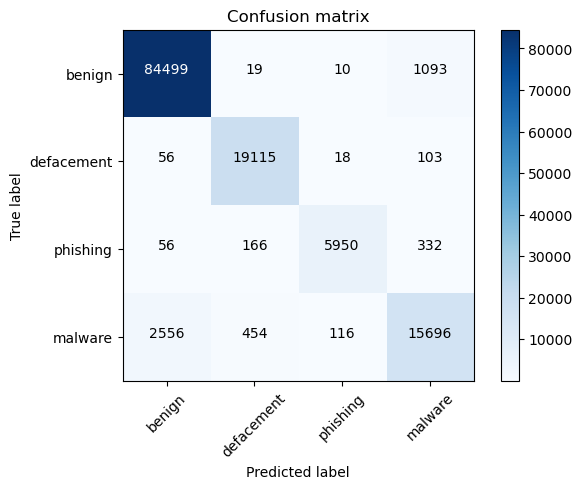

In [49]:
CM=confusion_matrix(y_test,y_pred_xgb,labels=[0,1,2,3])

plot_confusion_matrix(CM,classes=['benign', 'defacement','phishing','malware'])

In [50]:
xgb_feature = model_xgb.feature_importances_
xgb_features = xgb_feature.tolist()

## Gradient Boosting Classifier

In [51]:
from sklearn.ensemble import GradientBoostingClassifier
# gbdt = GradientBoostingClassifier(n_estimators=100,max_features='sqrt')

# Initialize and start the timer for model training
start_time_gbc = time.time()

gbdt = GradientBoostingClassifier( )
gbdt.fit(X_train,y_train)

# Calculate the model training time
training_time_gbc = time.time() - start_time_gbc

# Initialize and start the timer for model execution
start_time = time.time()

y_pred_gdbt = gbdt.predict(X_test)

# Calculate the model execution time
execution_time_gbc = ( time.time() - start_time ) / 130239

print(classification_report(y_test,y_pred_gdbt))

score = metrics.accuracy_score(y_test, y_pred_gdbt)
print("accuracy:   %0.3f" % score)

              precision    recall  f1-score   support

           0       0.96      0.99      0.97     85621
           1       0.91      0.97      0.94     19292
           2       0.93      0.81      0.87      6504
           3       0.88      0.76      0.81     18822

    accuracy                           0.94    130239
   macro avg       0.92      0.88      0.90    130239
weighted avg       0.94      0.94      0.94    130239

accuracy:   0.941


In [52]:
gbdt_train=gbdt.predict(X_train)
gbdt_test=gbdt.predict(X_test)

In [53]:
gbdt_feature = gbdt.feature_importances_
gbdt_features = gbdt_feature.tolist()

## Ada Boost Classifier

In [54]:
# Initialize and train the AdaBoostClassifier
# ada_classifier = AdaBoostClassifier(random_state=42)

# Initialize and start the timer for model training
start_time_ada = time.time()

ada_classifier = AdaBoostClassifier( )
ada_classifier.fit(X_train, y_train)

# Calculate the model training time
training_time_ada = time.time() - start_time_ada

# Initialize and start the timer for model execution
start_time = time.time()

# Predict the labels for the testing set
y_pred_ada = ada_classifier.predict(X_test)

# Calculate the model execution time
execution_time_ada = ( time.time() - start_time ) / 130239

print(classification_report(y_test,y_pred_ada))

score = metrics.accuracy_score(y_test, y_pred_ada)
print("accuracy:   %0.3f" % score)

              precision    recall  f1-score   support

           0       0.93      0.19      0.31     85621
           1       0.85      0.85      0.85     19292
           2       0.04      0.47      0.07      6504
           3       0.29      0.20      0.24     18822

    accuracy                           0.30    130239
   macro avg       0.53      0.43      0.37    130239
weighted avg       0.78      0.30      0.37    130239

accuracy:   0.303


## stacking

In [55]:
base_predictions_train = pd.DataFrame( {
    'LGBM Classifier': lgb_train.ravel(),
        'Random Forest Classifier': rf_train.ravel(),
     'XGB Classifier': model_xgb_train.ravel(),
     'Gradient Boosting Classifier': gbdt_train.ravel(),
    })
base_predictions_train.head(5)

,LGBM Classifier,Random Forest Classifier,XGB Classifier,Gradient Boosting Classifier
0,1,1,1,1
1,0,0,0,0
2,2,2,2,2
3,1,1,1,1
4,0,0,0,0


In [56]:
lgb_train=lgb_train.reshape(-1, 1)
rf_train=rf_train.reshape(-1, 1)
model_xgb_train=model_xgb_train.reshape(-1, 1)
gbdt_train=gbdt_train.reshape(-1, 1)
lgb_test=lgb_test.reshape(-1, 1)
rf_test=rf_test.reshape(-1, 1)
model_xgb_test=model_xgb_test.reshape(-1, 1)
gbdt_test=gbdt_test.reshape(-1, 1)

In [57]:
x_train = np.concatenate(( lgb_train, rf_train, model_xgb_train, gbdt_train), axis=1)
x_test = np.concatenate(( lgb_test, rf_test, model_xgb_test, gbdt_test), axis=1)

In [58]:
from sklearn.metrics import precision_recall_fscore_support
import seaborn as sns

# Initialize and start the timer for model training
start_time_stk = time.time()

stk = xgb.XGBClassifier().fit(x_train, y_train)

# Calculate the model training time
training_time_stk = time.time() - start_time_stk

# Initialize and start the timer for model execution
start_time = time.time()

y_predict=stk.predict(x_test)

# Calculate the model execution time
execution_time_stk = ( time.time() - start_time ) / 130239

y_true=y_test
stk_score=accuracy_score(y_true,y_predict)
print('Accuracy of Stacking: '+ str(stk_score))
precision,recall,fscore,none= precision_recall_fscore_support(y_true, y_predict, average='weighted') 
print('Precision of Stacking: '+(str(precision)))
print('Recall of Stacking: '+(str(recall)))
print('F1-score of Stacking: '+(str(fscore)))
print(classification_report(y_true,y_predict))

Accuracy of Stacking: 0.9662466695843794
Precision of Stacking: 0.965786423666889
Recall of Stacking: 0.9662466695843794
F1-score of Stacking: 0.9658823091226703
              precision    recall  f1-score   support

           0       0.97      0.98      0.98     85621
           1       0.98      0.99      0.99     19292
           2       0.99      0.94      0.97      6504
           3       0.91      0.86      0.88     18822

    accuracy                           0.97    130239
   macro avg       0.96      0.95      0.95    130239
weighted avg       0.97      0.97      0.97    130239



Confusion matrix, without normalization


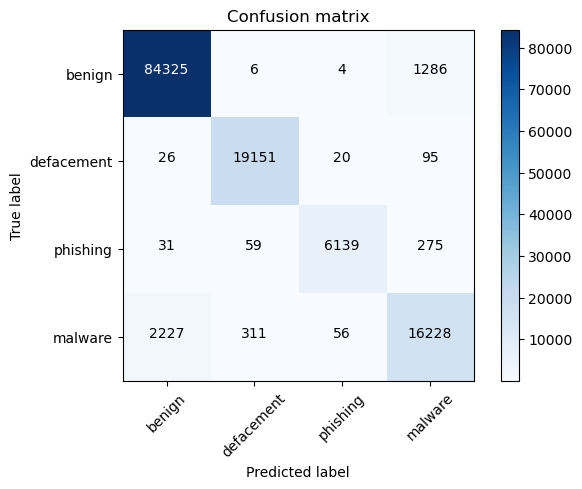

In [59]:
CM=confusion_matrix(y_test, y_predict, labels=[0,1,2,3])

plot_confusion_matrix(CM,classes=['benign', 'defacement','phishing','malware'])

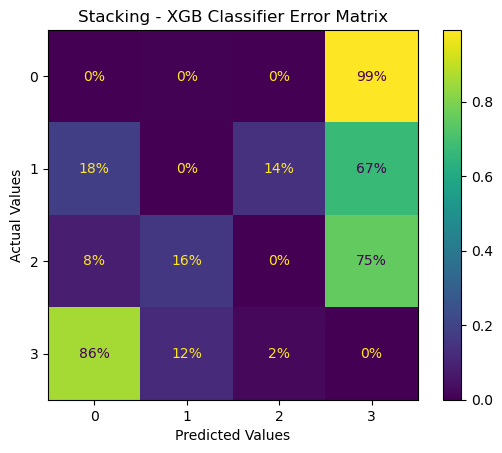

In [60]:
from sklearn.metrics import ConfusionMatrixDisplay
sample_weight = (y_predict != y_test)
ConfusionMatrixDisplay.from_predictions(y_test, y_predict, sample_weight=sample_weight, normalize="true", values_format=".0%")
plt.title('Stacking - XGB Classifier Error Matrix')
plt.ylabel('Actual Values')
plt.xlabel('Predicted Values')
# Save the plot as a PDF
plt.savefig('Stacking - XGB Classifier Error Matrix.pdf', format='pdf')
plt.show()

In [61]:
stk_feature = stk.feature_importances_
stk_features = gbdt_feature.tolist()

## Performance Metrics

In [62]:
from sklearn.metrics import classification_report, precision_score, recall_score, f1_score, accuracy_score

# Assuming you have imported the classifiers and defined their predictions
classifiers = [y_pred_ada, y_pred_sgd, y_pred_extra_trees, y_pred, y_pred_RF, y_pred_xgb, y_pred_gdbt, y_predict]
model_names = ['Ada Boost', 'SGD', 'Extra Trees', 'LGBM', 'Random Forest', 'XGB', 'Gradient Boosting', 'Stacking']

# Create a dictionary to map model names to their respective predictions
classifier_map = dict(zip(model_names, classifiers))

# Now you can use this dictionary to iterate over each model name and its predictions
for model_name, y_pred in classifier_map.items():
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    f1score = f1_score(y_test, y_pred, average='weighted')
    class_report = classification_report(y_test, y_pred)

    print(f"\nMetrics for Model '{model_name}':")
    print(f"Accuracy: {accuracy}")
    print(f"Precision: {precision}")
    print(f"Recall: {recall}")
    print(f"F1-score: {f1score}")
    print(f"Classification Report:\n{class_report}")



Metrics for Model 'Ada Boost':
Accuracy: 0.3031426838351032
Precision: 0.7842989102872673
Recall: 0.3031426838351032
F1-score: 0.3705179846970506
Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.19      0.31     85621
           1       0.85      0.85      0.85     19292
           2       0.04      0.47      0.07      6504
           3       0.29      0.20      0.24     18822

    accuracy                           0.30    130239
   macro avg       0.53      0.43      0.37    130239
weighted avg       0.78      0.30      0.37    130239


Metrics for Model 'SGD':
Accuracy: 0.8602492341003847
Precision: 0.8580055093734367
Recall: 0.8602492341003847
F1-score: 0.8387953453440391
Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.97      0.93     85621
           1       0.79      0.95      0.86     19292
           2       0.77      0.72      0.75      6504
           3  

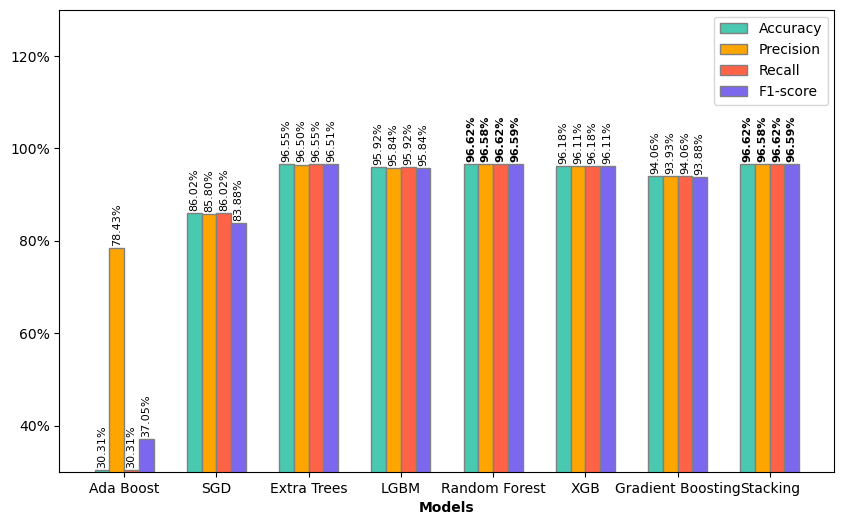

In [63]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import PercentFormatter

# Initialize data for the bar chart
models = list(classifier_map.keys())
metrics = ['Accuracy', 'Precision', 'Recall', 'F1-score']

# Calculate metric scores for each model
metric_scores = {}
for metric in metrics:
    metric_scores[metric] = [accuracy_score(y_test, classifier_map[model_name]) if metric == 'Accuracy'
                             else precision_score(y_test, classifier_map[model_name], average='weighted') if metric == 'Precision'
                             else recall_score(y_test, classifier_map[model_name], average='weighted') if metric == 'Recall'
                             else f1_score(y_test, classifier_map[model_name], average='weighted') for model_name in models]

# Set width of bars
bar_width = 0.16

# Set position of bars on X axis
r1 = np.arange(len(models))
r2 = [x + bar_width for x in r1]
r3 = [x + bar_width for x in r2]
r4 = [x + bar_width for x in r3]

plt.figure(figsize=(10, 6))

# Define light colors
colors = ['#48C9B0', '#FFA500', '#FF6347', '#7B68EE']

# Plotting the bars
bars = []
bars.append(plt.bar(r1, metric_scores['Accuracy'], color=colors[0], width=bar_width, edgecolor='grey', label='Accuracy'))
bars.append(plt.bar(r2, metric_scores['Precision'], color=colors[1], width=bar_width, edgecolor='grey', label='Precision'))
bars.append(plt.bar(r3, metric_scores['Recall'], color=colors[2], width=bar_width, edgecolor='grey', label='Recall'))
bars.append(plt.bar(r4, metric_scores['F1-score'], color=colors[3], width=bar_width, edgecolor='grey', label='F1-score'))

# Adding labels on top of each bar with percentage format
for i, container in enumerate(bars):
   for j, bar in enumerate(container):
       yval = bar.get_height()
       if yval == max(metric_scores[metrics[i]]):
           plt.text(bar.get_x() + bar.get_width()/2.0, yval + 0.005, f'{yval*100:.2f}%', va='bottom', ha='center', rotation=90, fontsize=8, weight='bold')
       else:
           plt.text(bar.get_x() + bar.get_width()/2.0, yval + 0.005, f'{yval*100:.2f}%', va='bottom', ha='center', rotation=90, fontsize=8)

# Add xticks on the middle of the group bars
plt.xlabel('Models', fontweight='bold')
plt.xticks([r + bar_width*1.5 for r in range(len(models))], models)

# Set y-axis as percentage and its limits
plt.gca().yaxis.set_major_formatter(PercentFormatter(xmax=1))
plt.ylim(0.3, 1.3)  # Keep the original scale but now interpreted as percentages

# Add a legend and show the plot
plt.legend()
# Save the plot as a PDF
plt.savefig('Model Performance Comparison.pdf', format='pdf')
plt.show()

# Training Time Comparision

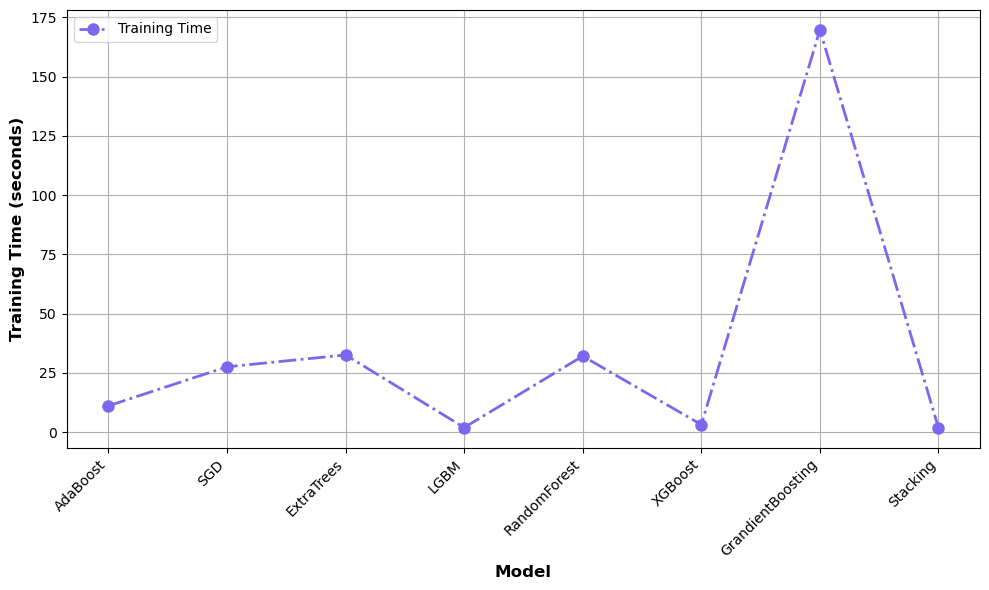

In [64]:
import numpy as np
import matplotlib.pyplot as plt

# Assuming you have imported the classifiers and defined their training times
training_times = [training_time_ada, training_time_sgd, training_time_et, training_time_lgbm, training_time_rf, training_time_xgb, training_time_gbc, training_time_stk]

# Transpose the training_times list to make it a 2D array
training_times = np.array(training_times).T

# Initialize data for the line plot
training_models = ['AdaBoost', 'SGD', 'ExtraTrees', 'LGBM', 'RandomForest', 'XGBoost', 'GrandientBoosting', 'Stacking']  # Assuming these are your model names

# Set figure size
plt.figure(figsize=(10, 6))

# Define line colors and styles
colors = ['#48C9B0', '#FFA500', '#FF6347', '#7B68EE', '#8A2BE2']
linestyles = ['-', '--', ':', '-.', '-']

plt.plot(training_models, training_times, color=colors[i], linestyle=linestyles[i], linewidth=2, marker='o', markersize=8, label='Training Time')

# Add grid and axis labels
plt.grid(True)
plt.xlabel('Model', fontweight='bold', fontsize=12)
plt.ylabel('Training Time (seconds)', fontweight='bold', fontsize=12)

# Set x-axis tick labels
plt.xticks(training_models, training_models, rotation=45, ha='right', fontsize=10)

# Add a legend
plt.legend(loc='upper left', fontsize=10)

# Adjust the layout
plt.tight_layout()

# Save the plot as a PDF
plt.savefig('Model Training Time Comparison.pdf', format='pdf')
plt.show()

# Execution Time Comparision

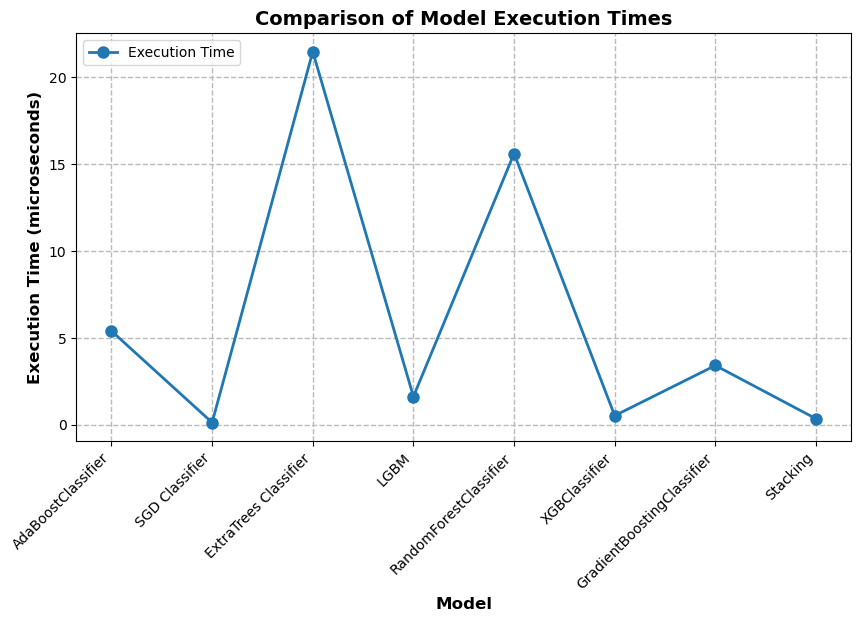

In [65]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.font_manager as font_manager

# Assuming you have imported the classifiers and defined their predicting times
execution_times = [execution_time_ada * 1_000_000,
                   execution_time_sgd * 1_000_000,
                   execution_time_et * 1_000_000,
                   execution_time_lgbm * 1_000_000,
                   execution_time_rf * 1_000_000,
                   execution_time_xgb * 1_000_000,
                   execution_time_gbc * 1_000_000,
                   execution_time_stk * 1_000_000]
model_names = ['AdaBoostClassifier', 'SGD Classifier', 'ExtraTrees Classifier', 'LGBM', 'RandomForestClassifier', 'XGBClassifier', 'GradientBoostingClassifier', 'Stacking']

execution_time = ['Execution Time']

# Create a dictionary to map model names to their execution_times (optional since we directly use execution_times and model_names)
# execution_times_map = dict(zip(model_names, execution_times))

# Initialize data for the line plot
x = np.arange(len(model_names))

# Set up the figure and axis
fig, ax = plt.subplots(figsize=(10, 6))

# Define the line properties
line_width = 2
marker_size = 8
marker_style = 'o'

# Plot the line graph
ax.plot(x, execution_times, linewidth=line_width, marker=marker_style, markersize=marker_size, color='#1f77b4')

# Add axis labels and title
ax.set_xlabel('Model', fontweight='bold', fontsize=12)
ax.set_ylabel('Execution Time (microseconds)', fontweight='bold', fontsize=12)
ax.set_title('Comparison of Model Execution Times', fontweight='bold', fontsize=14)

# Customize the x-axis ticks and labels
ax.set_xticks(x)
ax.set_xticklabels(model_names, rotation=45, ha='right', fontsize=10)

# Add grid lines
ax.grid(True, linestyle='--', linewidth=1, color='#BBBBBB')

# Adjust the spacing between subplots
plt.subplots_adjust(bottom=0.2)

# Add a legend
legend_font = font_manager.FontProperties(size=10)
ax.legend(execution_time, loc='upper left', prop=legend_font)

# Save the plot as a PDF
plt.savefig('Model Execution Time Comparison.pdf', format='pdf')
plt.show()

# Plotting ensemble Feature Importance

In [66]:
cols = X_train.columns
# Create a dataframe with features
feature_dataframe = pd.DataFrame( {'features': cols,

    'Stacking feature importances': stk_features,
    'Random Forest feature importances': rf_features,
    'Extra Trees feature importances': et_features

    })

# feature_dataframe['LGBM feature importances'] = feature_dataframe['LGBM feature importances'].astype(float)

print(feature_dataframe.dtypes)

import numpy as np

feature_dataframe['mean'] = feature_dataframe.select_dtypes(include='number').mean(axis=1) # axis = 1 computes the mean row-wise

# feature_dataframe['mean'] = feature_dataframe.mean(axis= 1) # axis = 1 computes the mean row-wise

feature_dataframe.head(4)

features                              object
Stacking feature importances         float64
Random Forest feature importances    float64
Extra Trees feature importances      float64
dtype: object


,features,Stacking feature importances,Random Forest feature importances,Extra Trees feature importances,mean
0,use_of_ip,0.017568,0.003810,0.018917,0.013432
1,abnormal_url,0.000026,0.073444,0.203686,0.092385
2,count.,0.012660,0.051019,0.049864,0.037848
3,count-www,0.148070,0.127803,0.139353,0.138409


C:\Users\wku\AppData\Local\Temp\ipykernel_19156\346242759.py:10: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  s.set_xticklabels(s.get_xticklabels(),rotation=90)


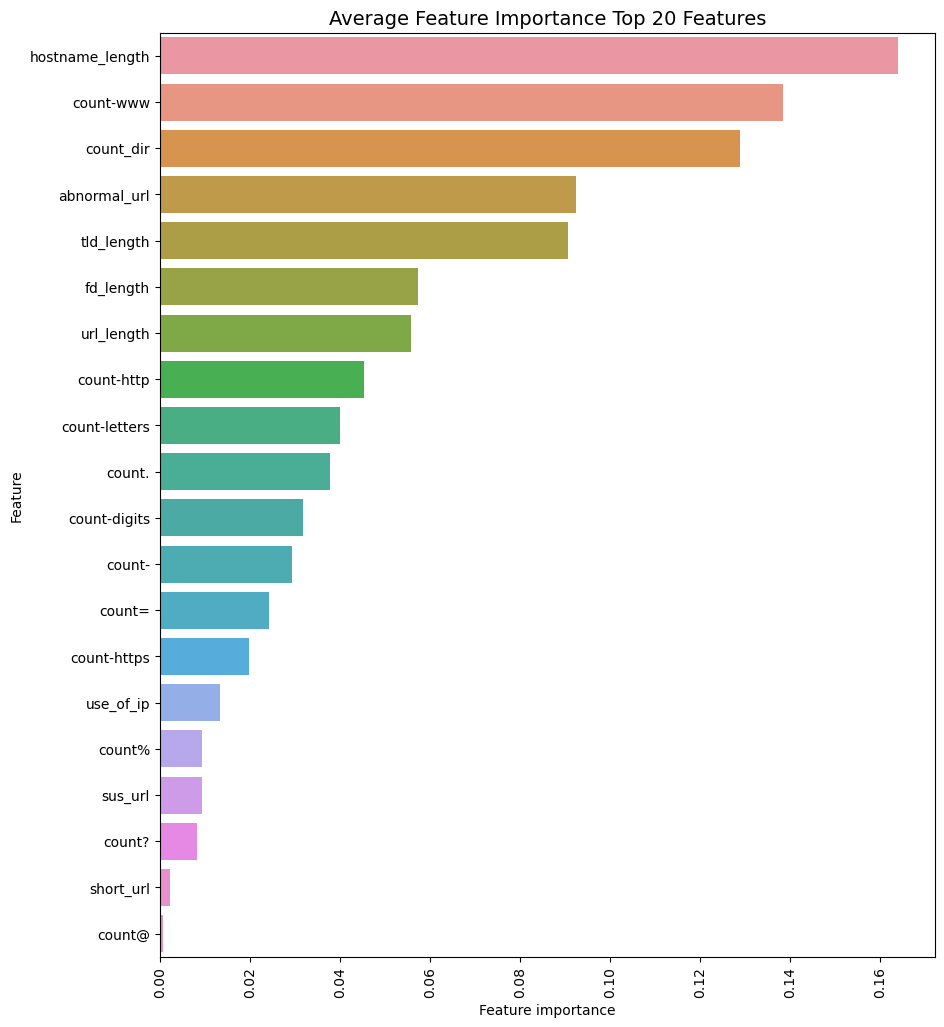

In [67]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
def plot_feature_importance():
    tmp = pd.DataFrame({'Feature': X_test.columns, 'Feature importance': feature_dataframe['mean'].values})
    tmp = tmp.sort_values(by='Feature importance',ascending=False).head(20)
    plt.figure(figsize = (10,12))
    plt.title('Average Feature Importance Top 20 Features',fontsize=14)
    s = sns.barplot(y='Feature',x='Feature importance',data=tmp, orient='h')
    s.set_xticklabels(s.get_xticklabels(),rotation=90)
    # Save the plot as a PDF
    plt.savefig('Average Feature Importance Top 20 Features.pdf', format='pdf')
    plt.show()
plot_feature_importance()

# hyper parameter tuning

## extra trees classifier

In [68]:
import optuna

def objective(trial):

    # Number of trees in extra trees
    
    n_estimators = trial.suggest_int(name="n_estimators", low=100, high=500, step=100)

    # Number of features to consider at every split
    max_features = trial.suggest_categorical(name="max_features", choices=['auto', 'sqrt'])

    # Maximum number of levels in tree
    max_depth = trial.suggest_int(name="max_depth", low=10, high=110, step=20)

    # Minimum number of samples required to split a node
    min_samples_split = trial.suggest_int(name="min_samples_split", low=2, high=10, step=2)

    # Minimum number of samples required at each leaf node
    min_samples_leaf = trial.suggest_int(name="min_samples_leaf", low=1, high=4, step=1)

    
    # Random state
    random_state = trial.suggest_int(name="random_state", low=0, high=100, step=1)
    
    params = {
        "n_estimators": n_estimators,
        "max_features": max_features,
        "max_depth": max_depth,
        "min_samples_split": min_samples_split,
        "min_samples_leaf": min_samples_leaf,
        "random_state": random_state
    }
    
    model_et = ExtraTreesClassifier(**params)
    model_et.fit(X_train, y_train)
    predictions_et = model_et.predict(X_test)
    # Calculate the accuracy of the model
    accuracy = accuracy_score(y_test, predictions_et)
    return accuracy

study_et = optuna.create_study(direction='maximize')
study_et.optimize(objective, n_trials=30)

[I 2024-06-29 14:09:13,989] A new study created in memory with name: no-name-81949bba-7a90-4a55-a285-251f41a58413
[I 2024-06-29 14:09:36,953] Trial 0 finished with value: 0.9554588103409885 and parameters: {'n_estimators': 100, 'max_features': 'sqrt', 'max_depth': 30, 'min_samples_split': 8, 'min_samples_leaf': 2, 'random_state': 88}. Best is trial 0 with value: 0.9554588103409885.
[I 2024-06-29 14:10:01,779] Trial 1 finished with value: 0.9601808981948572 and parameters: {'n_estimators': 100, 'max_features': 'sqrt', 'max_depth': 50, 'min_samples_split': 10, 'min_samples_leaf': 2, 'random_state': 37}. Best is trial 1 with value: 0.9601808981948572.
C:\anaconda\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
[I 

In [69]:
print('Extra Trees Best hyperparameters:', study_et.best_params)
print('Extra Trees Best Accuracy:', study_et.best_value)

Extra Trees Best hyperparameters: {'n_estimators': 400, 'max_features': 'auto', 'max_depth': 90, 'min_samples_split': 10, 'min_samples_leaf': 1, 'random_state': 68}
Extra Trees Best Accuracy: 0.9669377068312871


In [70]:
# Initialize and start the timer for model training
start_time = time.time()

best_model_et = ExtraTreesClassifier(**study_et.best_params)
best_model_et.fit(X_train, y_train)

# Calculate the model training time
training_time_et_optuna = time.time() - start_time

train_et = best_model_et.predict(X_train)

# Initialize and start the timer for model execution
start_time = time.time()

test_et = best_model_et.predict(X_test)

# Calculate the model execution time
execution_time_et_optuna = ( time.time() - start_time ) / 130239

C:\anaconda\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


In [71]:
et_feature_optuna = best_model_et.feature_importances_
et_features_optuna = et_feature_optuna.tolist()

## random forest

In [72]:
import optuna
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

def objective(trial_rf):
    # Number of trees in random forest
    
    n_estimators = trial_rf.suggest_int(name="n_estimators", low=100, high=500, step=100)

    # Number of features to consider at every split
    max_features = trial_rf.suggest_categorical(name="max_features", choices=['auto', 'sqrt'])

    # Maximum number of levels in tree
    max_depth = trial_rf.suggest_int(name="max_depth", low=10, high=110, step=20)

    # Minimum number of samples required to split a node
    min_samples_split = trial_rf.suggest_int(name="min_samples_split", low=2, high=10, step=2)

    # Minimum number of samples required at each leaf node
    min_samples_leaf = trial_rf.suggest_int(name="min_samples_leaf", low=1, high=4, step=1)
    
    # Random state
    random_state = trial_rf.suggest_int(name="random_state", low=0, high=100, step=1)
    
    params_rf = {
        "n_estimators": n_estimators,
        "max_features": max_features,
        "max_depth": max_depth,
        "min_samples_split": min_samples_split,
        "min_samples_leaf": min_samples_leaf,
        "random_state": random_state
    }
    
    model_rf = RandomForestClassifier(**params_rf)
    model_rf.fit(X_train, y_train)
    predictions_rf = model_rf.predict(X_test)
    # Calculate the accuracy of the model
    accuracy = accuracy_score(y_test, predictions_rf)
    return accuracy

study_rf = optuna.create_study(direction='maximize')
study_rf.optimize(objective, n_trials=30)

print('Random Forest Best hyperparameters:', study_rf.best_params)
print('Random Forest Best Accuracy:', study_rf.best_value)

[I 2024-06-29 14:51:46,115] A new study created in memory with name: no-name-49dea0c3-f268-466b-8add-eec75b4c21bf
[I 2024-06-29 14:52:15,417] Trial 0 finished with value: 0.9633903822971613 and parameters: {'n_estimators': 100, 'max_features': 'sqrt', 'max_depth': 30, 'min_samples_split': 6, 'min_samples_leaf': 4, 'random_state': 22}. Best is trial 0 with value: 0.9633903822971613.
C:\anaconda\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
[I 2024-06-29 14:54:10,418] Trial 1 finished with value: 0.9635746588963368 and parameters: {'n_estimators': 400, 'max_features': 'auto', 'max_depth': 50, 'min_samples_split': 8, 'min_samples_leaf': 4, 'random_state': 52}. Best is trial 1 with value: 0.9635746588963368.
C:\a

Random Forest Best hyperparameters: {'n_estimators': 500, 'max_features': 'sqrt', 'max_depth': 30, 'min_samples_split': 4, 'min_samples_leaf': 1, 'random_state': 100}
Random Forest Best Accuracy: 0.9674214329041224


In [73]:
# Initialize and start the timer for model training
start_time = time.time()

best_model_rf = RandomForestClassifier(**study_rf.best_params)
best_model_rf.fit(X_train, y_train)

# Calculate the model training time
training_time_rf_optuna = time.time() - start_time

train_rf = best_model_rf.predict(X_train)

# Initialize and start the timer for model execution
start_time = time.time()

test_rf = best_model_rf.predict(X_test)

# Calculate the model execution time
execution_time_rf_optuna = ( time.time() - start_time ) / 130239

In [74]:
rf_feature_optuna = best_model_rf.feature_importances_
rf_features_optuna = rf_feature_optuna.tolist()

Confusion matrix, without normalization


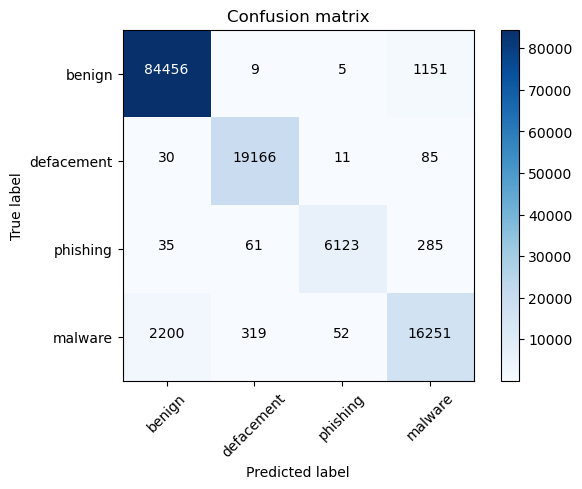

In [75]:
CM_RF_optuna=confusion_matrix(y_test,test_rf,labels=[0,1,2,3])

plot_confusion_matrix(CM_RF_optuna,classes=['benign', 'defacement','phishing','malware'])

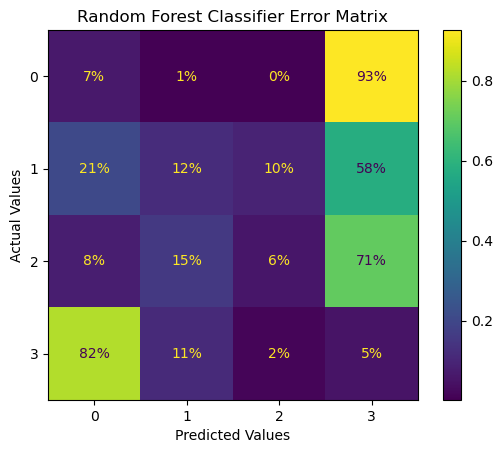

In [76]:
from sklearn.metrics import ConfusionMatrixDisplay
sample_weight = (test_rf != y_test)
ConfusionMatrixDisplay.from_predictions(y_test, y_predict, sample_weight=sample_weight, normalize="true", values_format=".0%")
plt.title('Random Forest Classifier Error Matrix')
plt.ylabel('Actual Values')
plt.xlabel('Predicted Values')
# Save the plot as a PDF
plt.savefig('Random Forest Classifier After Optuna Error Matrix.pdf', format='pdf')
plt.show()

## ada boost

In [77]:
def objective(trial_ada):
    # Number of trees in random forest
    
    n_estimators = trial_ada.suggest_int(name="n_estimators", low=100, high=500, step=100)
    
    # Random state
    random_state = trial_ada.suggest_int(name="random_state", low=0, high=100, step=1)
    
    params_ada = {
        "n_estimators": n_estimators,
        "random_state": random_state
    }
    
    model_ada = AdaBoostClassifier(**params_ada)
    model_ada.fit(X_train, y_train)
    predictions_ada = model_ada.predict(X_test)
    # Calculate the accuracy of the model
    accuracy = accuracy_score(y_test, predictions_ada)
    return accuracy

study_ada = optuna.create_study(direction='maximize')
study_ada.optimize(objective, n_trials=30)

print('Ada Boost Best hyperparameters:', study_ada.best_params)
print('Ada Boost Forest Best Accuracy:', study_ada.best_value)

[I 2024-06-29 15:35:30,725] A new study created in memory with name: no-name-c5bdbab4-5254-4f75-87ad-aea4eeab90cf
[I 2024-06-29 15:36:42,654] Trial 0 finished with value: 0.35923187370910403 and parameters: {'n_estimators': 300, 'random_state': 9}. Best is trial 0 with value: 0.35923187370910403.
[I 2024-06-29 15:38:44,160] Trial 1 finished with value: 0.36046806256190544 and parameters: {'n_estimators': 500, 'random_state': 9}. Best is trial 1 with value: 0.36046806256190544.
[I 2024-06-29 15:39:08,328] Trial 2 finished with value: 0.31052910418538227 and parameters: {'n_estimators': 100, 'random_state': 24}. Best is trial 1 with value: 0.36046806256190544.
[I 2024-06-29 15:41:06,725] Trial 3 finished with value: 0.36046806256190544 and parameters: {'n_estimators': 500, 'random_state': 24}. Best is trial 1 with value: 0.36046806256190544.
[I 2024-06-29 15:42:17,265] Trial 4 finished with value: 0.35923187370910403 and parameters: {'n_estimators': 300, 'random_state': 69}. Best is tria

Ada Boost Best hyperparameters: {'n_estimators': 200, 'random_state': 47}
Ada Boost Forest Best Accuracy: 0.401331398429042


In [78]:
# Initialize and start the timer for model training
start_time = time.time()

best_model_ada = AdaBoostClassifier(**study_ada.best_params)
best_model_ada.fit(X_train, y_train)

# Calculate the model training time
training_time_ada_optuna = time.time() - start_time

train_ada = best_model_ada.predict(X_train)

# Initialize and start the timer for model execution
start_time = time.time()

test_ada = best_model_ada.predict(X_test)

# Calculate the model execution time
execution_time_ada_optuna = ( time.time() - start_time ) / 130239

In [79]:
ada_feature_optuna = best_model_ada.feature_importances_
ada_features_optuna = ada_feature_optuna.tolist()

## SGD Classifier

In [80]:
def objective(trial_sgd):

    # Random state
    random_state = trial_sgd.suggest_int(name="random_state", low=0, high=100, step=1)
    
    params_sgd = {
        "random_state": random_state
    }
    
    model_sgd = SGDClassifier(**params_sgd)
    model_sgd.fit(X_train, y_train)
    predictions_sgd = model_sgd.predict(X_test)
    # Calculate the accuracy of the model
    accuracy = accuracy_score(y_test, predictions_sgd)
    return accuracy

study_sgd = optuna.create_study(direction='maximize')
study_sgd.optimize(objective, n_trials=30)

print('SGD Classifier Best hyperparameters:', study_sgd.best_params)
print('SGD Classifier Best Accuracy:', study_sgd.best_value)

[I 2024-06-29 16:06:55,077] A new study created in memory with name: no-name-ebbba264-a597-41d5-82f9-d1f682f5a796
[I 2024-06-29 16:07:21,385] Trial 0 finished with value: 0.8534309999308963 and parameters: {'random_state': 51}. Best is trial 0 with value: 0.8534309999308963.
[I 2024-06-29 16:07:49,834] Trial 1 finished with value: 0.8606101091071031 and parameters: {'random_state': 72}. Best is trial 1 with value: 0.8606101091071031.
[I 2024-06-29 16:08:16,762] Trial 2 finished with value: 0.8566942313746266 and parameters: {'random_state': 79}. Best is trial 1 with value: 0.8606101091071031.
[I 2024-06-29 16:08:40,962] Trial 3 finished with value: 0.8649329309960918 and parameters: {'random_state': 39}. Best is trial 3 with value: 0.8649329309960918.
[I 2024-06-29 16:09:06,583] Trial 4 finished with value: 0.8502906195532828 and parameters: {'random_state': 73}. Best is trial 3 with value: 0.8649329309960918.
[I 2024-06-29 16:09:33,841] Trial 5 finished with value: 0.8542064972857593 

SGD Classifier Best hyperparameters: {'random_state': 34}
SGD Classifier Best Accuracy: 0.8652784496195456


In [81]:
# Initialize and start the timer for model training
start_time = time.time()

best_model_sgd = SGDClassifier(**study_sgd.best_params)
best_model_sgd.fit(X_train, y_train)

# Calculate the model training time
training_time_sgd_optuna = time.time() - start_time

train_sgd = best_model_sgd.predict(X_train)

# Initialize and start the timer for model execution
start_time = time.time()

test_sgd = best_model_sgd.predict(X_test)

# Calculate the model execution time
execution_time_sgd_optuna = ( time.time() - start_time ) / 130239

## LGBM

In [82]:
def objective(trial_lgbm):
    # Number of trees in lgbm
    
    n_estimators = trial_lgbm.suggest_int(name="n_estimators", low=100, high=500, step=100)

    # Number of features to consider at every split
    max_features = trial_lgbm.suggest_categorical(name="max_features", choices=['auto', 'sqrt'])

    # Maximum number of levels in tree
    max_depth = trial_lgbm.suggest_int(name="max_depth", low=10, high=110, step=20)

    # Minimum number of samples required to split a node
    min_samples_split = trial_lgbm.suggest_int(name="min_samples_split", low=2, high=10, step=2)

    # Minimum number of samples required at each leaf node
    min_samples_leaf = trial_lgbm.suggest_int(name="min_samples_leaf", low=1, high=4, step=1)
    
    # Random state
    random_state = trial_lgbm.suggest_int(name="random_state", low=0, high=100, step=1)
    
    params_lgbm = {
        "n_estimators": n_estimators,
        "max_features": max_features,
        "max_depth": max_depth,
        "min_samples_split": min_samples_split,
        "min_samples_leaf": min_samples_leaf,
        "random_state": random_state
    }
    
    model_lgbm = LGBMClassifier(**params_lgbm)
    model_lgbm.fit(X_train, y_train)
    predictions_lgbm = model_lgbm.predict(X_test)
    # Calculate the accuracy of the model
    accuracy = accuracy_score(y_test, predictions_lgbm)
    return accuracy

study_lgbm = optuna.create_study(direction='maximize')
study_lgbm.optimize(objective, n_trials=30)

print('LGBM Classifier Best hyperparameters:', study_lgbm.best_params)
print('LGBM Classifier Best Accuracy:', study_lgbm.best_value)

[I 2024-06-29 16:20:18,618] A new study created in memory with name: no-name-421cef3a-cfd2-4399-b467-44d5def8cc30


[LightGBM] [Warning] Unknown parameter: max_features
[LightGBM] [Warning] Unknown parameter: min_samples_split
[LightGBM] [Warning] min_data_in_leaf is set with min_child_samples=20, will be overridden by min_samples_leaf=4. Current value: min_data_in_leaf=4
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Unknown parameter: max_features
[LightGBM] [Warning] Unknown parameter: min_samples_split
[LightGBM] [Warning] min_data_in_leaf is set with min_child_samples=20, will be overridden by min_samples_leaf=4. Current value: min_data_in_leaf=4
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.013232 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=tru

[I 2024-06-29 16:20:23,687] Trial 0 finished with value: 0.9636514408126599 and parameters: {'n_estimators': 300, 'max_features': 'sqrt', 'max_depth': 110, 'min_samples_split': 2, 'min_samples_leaf': 4, 'random_state': 30}. Best is trial 0 with value: 0.9636514408126599.


[LightGBM] [Warning] Unknown parameter: max_features
[LightGBM] [Warning] Unknown parameter: min_samples_split
[LightGBM] [Warning] min_data_in_leaf is set with min_child_samples=20, will be overridden by min_samples_leaf=4. Current value: min_data_in_leaf=4
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Unknown parameter: max_features
[LightGBM] [Warning] Unknown parameter: min_samples_split
[LightGBM] [Warning] min_data_in_leaf is set with min_child_samples=20, will be overridden by min_samples_leaf=4. Current value: min_data_in_leaf=4
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.014988 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=tru

[I 2024-06-29 16:20:32,064] Trial 1 finished with value: 0.9611560285321601 and parameters: {'n_estimators': 500, 'max_features': 'sqrt', 'max_depth': 90, 'min_samples_split': 6, 'min_samples_leaf': 4, 'random_state': 52}. Best is trial 0 with value: 0.9636514408126599.


[LightGBM] [Warning] Unknown parameter: max_features
[LightGBM] [Warning] Unknown parameter: min_samples_split
[LightGBM] [Warning] min_data_in_leaf is set with min_child_samples=20, will be overridden by min_samples_leaf=3. Current value: min_data_in_leaf=3
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Unknown parameter: max_features
[LightGBM] [Warning] Unknown parameter: min_samples_split
[LightGBM] [Warning] min_data_in_leaf is set with min_child_samples=20, will be overridden by min_samples_leaf=3. Current value: min_data_in_leaf=3
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.016434 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=tru

[I 2024-06-29 16:20:35,654] Trial 2 finished with value: 0.9624229301514907 and parameters: {'n_estimators': 200, 'max_features': 'sqrt', 'max_depth': 10, 'min_samples_split': 6, 'min_samples_leaf': 3, 'random_state': 24}. Best is trial 0 with value: 0.9636514408126599.


[LightGBM] [Warning] Unknown parameter: max_features
[LightGBM] [Warning] Unknown parameter: min_samples_split
[LightGBM] [Warning] min_data_in_leaf is set with min_child_samples=20, will be overridden by min_samples_leaf=4. Current value: min_data_in_leaf=4
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Unknown parameter: max_features
[LightGBM] [Warning] Unknown parameter: min_samples_split
[LightGBM] [Warning] min_data_in_leaf is set with min_child_samples=20, will be overridden by min_samples_leaf=4. Current value: min_data_in_leaf=4
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.012575 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=tru

[I 2024-06-29 16:20:37,634] Trial 3 finished with value: 0.9588525710424681 and parameters: {'n_estimators': 100, 'max_features': 'sqrt', 'max_depth': 70, 'min_samples_split': 4, 'min_samples_leaf': 4, 'random_state': 72}. Best is trial 0 with value: 0.9636514408126599.


[LightGBM] [Warning] Unknown parameter: max_features
[LightGBM] [Warning] Unknown parameter: min_samples_split
[LightGBM] [Warning] min_data_in_leaf is set with min_child_samples=20, will be overridden by min_samples_leaf=4. Current value: min_data_in_leaf=4
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Unknown parameter: max_features
[LightGBM] [Warning] Unknown parameter: min_samples_split
[LightGBM] [Warning] min_data_in_leaf is set with min_child_samples=20, will be overridden by min_samples_leaf=3. Current value: min_data_in_leaf=3
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Unknown parameter: max_features
[LightGBM] [Warning] Unknown parameter: min_samples_split
[LightGBM] [Warning] min_data_in_leaf is set with min_child_samples=20, will be overridden by min_samples_leaf=

[I 2024-06-29 16:20:46,141] Trial 4 finished with value: 0.9605955205430017 and parameters: {'n_estimators': 500, 'max_features': 'sqrt', 'max_depth': 110, 'min_samples_split': 6, 'min_samples_leaf': 3, 'random_state': 44}. Best is trial 0 with value: 0.9636514408126599.


[LightGBM] [Warning] Unknown parameter: max_features
[LightGBM] [Warning] Unknown parameter: min_samples_split
[LightGBM] [Warning] min_data_in_leaf is set with min_child_samples=20, will be overridden by min_samples_leaf=1. Current value: min_data_in_leaf=1
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Unknown parameter: max_features
[LightGBM] [Warning] Unknown parameter: min_samples_split
[LightGBM] [Warning] min_data_in_leaf is set with min_child_samples=20, will be overridden by min_samples_leaf=1. Current value: min_data_in_leaf=1
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.016169 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=tru

[I 2024-06-29 16:20:54,926] Trial 5 finished with value: 0.9582383157118836 and parameters: {'n_estimators': 500, 'max_features': 'auto', 'max_depth': 10, 'min_samples_split': 4, 'min_samples_leaf': 1, 'random_state': 39}. Best is trial 0 with value: 0.9636514408126599.


[LightGBM] [Warning] Unknown parameter: max_features
[LightGBM] [Warning] Unknown parameter: min_samples_split
[LightGBM] [Warning] min_data_in_leaf is set with min_child_samples=20, will be overridden by min_samples_leaf=1. Current value: min_data_in_leaf=1
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Unknown parameter: max_features
[LightGBM] [Warning] Unknown parameter: min_samples_split
[LightGBM] [Warning] min_data_in_leaf is set with min_child_samples=20, will be overridden by min_samples_leaf=1. Current value: min_data_in_leaf=1
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.012248 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=tru

[I 2024-06-29 16:21:00,514] Trial 6 finished with value: 0.9638587519867321 and parameters: {'n_estimators': 300, 'max_features': 'sqrt', 'max_depth': 110, 'min_samples_split': 8, 'min_samples_leaf': 1, 'random_state': 55}. Best is trial 6 with value: 0.9638587519867321.


[LightGBM] [Warning] Unknown parameter: max_features
[LightGBM] [Warning] Unknown parameter: min_samples_split
[LightGBM] [Warning] min_data_in_leaf is set with min_child_samples=20, will be overridden by min_samples_leaf=4. Current value: min_data_in_leaf=4
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Unknown parameter: max_features
[LightGBM] [Warning] Unknown parameter: min_samples_split
[LightGBM] [Warning] min_data_in_leaf is set with min_child_samples=20, will be overridden by min_samples_leaf=4. Current value: min_data_in_leaf=4
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.015813 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=tru

[I 2024-06-29 16:21:07,829] Trial 7 finished with value: 0.9644269381675228 and parameters: {'n_estimators': 400, 'max_features': 'sqrt', 'max_depth': 30, 'min_samples_split': 6, 'min_samples_leaf': 4, 'random_state': 53}. Best is trial 7 with value: 0.9644269381675228.


[LightGBM] [Warning] Unknown parameter: max_features
[LightGBM] [Warning] Unknown parameter: min_samples_split
[LightGBM] [Warning] min_data_in_leaf is set with min_child_samples=20, will be overridden by min_samples_leaf=3. Current value: min_data_in_leaf=3
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Unknown parameter: max_features
[LightGBM] [Warning] Unknown parameter: min_samples_split
[LightGBM] [Warning] min_data_in_leaf is set with min_child_samples=20, will be overridden by min_samples_leaf=3. Current value: min_data_in_leaf=3
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.012317 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=tru

[I 2024-06-29 16:21:15,311] Trial 8 finished with value: 0.960679980650957 and parameters: {'n_estimators': 400, 'max_features': 'auto', 'max_depth': 90, 'min_samples_split': 10, 'min_samples_leaf': 3, 'random_state': 24}. Best is trial 7 with value: 0.9644269381675228.


[LightGBM] [Warning] Unknown parameter: max_features
[LightGBM] [Warning] Unknown parameter: min_samples_split
[LightGBM] [Warning] min_data_in_leaf is set with min_child_samples=20, will be overridden by min_samples_leaf=1. Current value: min_data_in_leaf=1
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Unknown parameter: max_features
[LightGBM] [Warning] Unknown parameter: min_samples_split
[LightGBM] [Warning] min_data_in_leaf is set with min_child_samples=20, will be overridden by min_samples_leaf=1. Current value: min_data_in_leaf=1
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.013618 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=tru

[I 2024-06-29 16:21:17,400] Trial 9 finished with value: 0.9585070524190142 and parameters: {'n_estimators': 100, 'max_features': 'sqrt', 'max_depth': 50, 'min_samples_split': 10, 'min_samples_leaf': 1, 'random_state': 72}. Best is trial 7 with value: 0.9644269381675228.


[LightGBM] [Warning] Unknown parameter: max_features
[LightGBM] [Warning] Unknown parameter: min_samples_split
[LightGBM] [Warning] min_data_in_leaf is set with min_child_samples=20, will be overridden by min_samples_leaf=1. Current value: min_data_in_leaf=1
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Unknown parameter: max_features
[LightGBM] [Warning] Unknown parameter: min_samples_split
[LightGBM] [Warning] min_data_in_leaf is set with min_child_samples=20, will be overridden by min_samples_leaf=2. Current value: min_data_in_leaf=2
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Unknown parameter: max_features
[LightGBM] [Warning] Unknown parameter: min_samples_split
[LightGBM] [Warning] min_data_in_leaf is set with min_child_samples=20, will be overridden by min_samples_leaf=

[I 2024-06-29 16:21:24,577] Trial 10 finished with value: 0.9607951535254416 and parameters: {'n_estimators': 400, 'max_features': 'auto', 'max_depth': 30, 'min_samples_split': 2, 'min_samples_leaf': 2, 'random_state': 2}. Best is trial 7 with value: 0.9644269381675228.


[LightGBM] [Warning] Unknown parameter: max_features
[LightGBM] [Warning] Unknown parameter: min_samples_split
[LightGBM] [Warning] min_data_in_leaf is set with min_child_samples=20, will be overridden by min_samples_leaf=2. Current value: min_data_in_leaf=2
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Unknown parameter: max_features
[LightGBM] [Warning] Unknown parameter: min_samples_split
[LightGBM] [Warning] min_data_in_leaf is set with min_child_samples=20, will be overridden by min_samples_leaf=2. Current value: min_data_in_leaf=2
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.012782 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=tru

[I 2024-06-29 16:21:30,207] Trial 11 finished with value: 0.963305922189206 and parameters: {'n_estimators': 300, 'max_features': 'sqrt', 'max_depth': 50, 'min_samples_split': 8, 'min_samples_leaf': 2, 'random_state': 99}. Best is trial 7 with value: 0.9644269381675228.


[LightGBM] [Warning] Unknown parameter: max_features
[LightGBM] [Warning] Unknown parameter: min_samples_split
[LightGBM] [Warning] min_data_in_leaf is set with min_child_samples=20, will be overridden by min_samples_leaf=2. Current value: min_data_in_leaf=2
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Unknown parameter: max_features
[LightGBM] [Warning] Unknown parameter: min_samples_split
[LightGBM] [Warning] min_data_in_leaf is set with min_child_samples=20, will be overridden by min_samples_leaf=2. Current value: min_data_in_leaf=2
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.013438 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=tru

[I 2024-06-29 16:21:37,158] Trial 12 finished with value: 0.9613863742811293 and parameters: {'n_estimators': 400, 'max_features': 'sqrt', 'max_depth': 30, 'min_samples_split': 8, 'min_samples_leaf': 2, 'random_state': 61}. Best is trial 7 with value: 0.9644269381675228.


[LightGBM] [Warning] Unknown parameter: max_features
[LightGBM] [Warning] Unknown parameter: min_samples_split
[LightGBM] [Warning] min_data_in_leaf is set with min_child_samples=20, will be overridden by min_samples_leaf=1. Current value: min_data_in_leaf=1
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Unknown parameter: max_features
[LightGBM] [Warning] Unknown parameter: min_samples_split
[LightGBM] [Warning] min_data_in_leaf is set with min_child_samples=20, will be overridden by min_samples_leaf=1. Current value: min_data_in_leaf=1
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.012982 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=tru

[I 2024-06-29 16:21:41,017] Trial 13 finished with value: 0.9623307918519031 and parameters: {'n_estimators': 200, 'max_features': 'sqrt', 'max_depth': 70, 'min_samples_split': 8, 'min_samples_leaf': 1, 'random_state': 90}. Best is trial 7 with value: 0.9644269381675228.


[LightGBM] [Warning] Unknown parameter: max_features
[LightGBM] [Warning] Unknown parameter: min_samples_split
[LightGBM] [Warning] min_data_in_leaf is set with min_child_samples=20, will be overridden by min_samples_leaf=2. Current value: min_data_in_leaf=2
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Unknown parameter: max_features
[LightGBM] [Warning] Unknown parameter: min_samples_split
[LightGBM] [Warning] min_data_in_leaf is set with min_child_samples=20, will be overridden by min_samples_leaf=2. Current value: min_data_in_leaf=2
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.013107 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=tru

[I 2024-06-29 16:21:46,543] Trial 14 finished with value: 0.9620006296117138 and parameters: {'n_estimators': 300, 'max_features': 'auto', 'max_depth': 30, 'min_samples_split': 8, 'min_samples_leaf': 2, 'random_state': 66}. Best is trial 7 with value: 0.9644269381675228.


[LightGBM] [Warning] Unknown parameter: max_features
[LightGBM] [Warning] Unknown parameter: min_samples_split
[LightGBM] [Warning] min_data_in_leaf is set with min_child_samples=20, will be overridden by min_samples_leaf=3. Current value: min_data_in_leaf=3
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Unknown parameter: max_features
[LightGBM] [Warning] Unknown parameter: min_samples_split
[LightGBM] [Warning] min_data_in_leaf is set with min_child_samples=20, will be overridden by min_samples_leaf=3. Current value: min_data_in_leaf=3
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.015863 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=tru

[I 2024-06-29 16:21:50,273] Trial 15 finished with value: 0.9626916668586215 and parameters: {'n_estimators': 200, 'max_features': 'sqrt', 'max_depth': 90, 'min_samples_split': 4, 'min_samples_leaf': 3, 'random_state': 83}. Best is trial 7 with value: 0.9644269381675228.


[LightGBM] [Warning] Unknown parameter: max_features
[LightGBM] [Warning] Unknown parameter: min_samples_split
[LightGBM] [Warning] min_data_in_leaf is set with min_child_samples=20, will be overridden by min_samples_leaf=1. Current value: min_data_in_leaf=1
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Unknown parameter: max_features
[LightGBM] [Warning] Unknown parameter: min_samples_split
[LightGBM] [Warning] min_data_in_leaf is set with min_child_samples=20, will be overridden by min_samples_leaf=1. Current value: min_data_in_leaf=1
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.010732 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=tru

[I 2024-06-29 16:21:57,705] Trial 16 finished with value: 0.9642349833767151 and parameters: {'n_estimators': 400, 'max_features': 'sqrt', 'max_depth': 50, 'min_samples_split': 10, 'min_samples_leaf': 1, 'random_state': 55}. Best is trial 7 with value: 0.9644269381675228.


[LightGBM] [Warning] Unknown parameter: max_features
[LightGBM] [Warning] Unknown parameter: min_samples_split
[LightGBM] [Warning] min_data_in_leaf is set with min_child_samples=20, will be overridden by min_samples_leaf=4. Current value: min_data_in_leaf=4
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Unknown parameter: max_features
[LightGBM] [Warning] Unknown parameter: min_samples_split
[LightGBM] [Warning] min_data_in_leaf is set with min_child_samples=20, will be overridden by min_samples_leaf=4. Current value: min_data_in_leaf=4
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.011056 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=tru

[I 2024-06-29 16:22:04,789] Trial 17 finished with value: 0.9634825205967491 and parameters: {'n_estimators': 400, 'max_features': 'sqrt', 'max_depth': 50, 'min_samples_split': 10, 'min_samples_leaf': 4, 'random_state': 11}. Best is trial 7 with value: 0.9644269381675228.


[LightGBM] [Warning] Unknown parameter: max_features
[LightGBM] [Warning] Unknown parameter: min_samples_split
[LightGBM] [Warning] min_data_in_leaf is set with min_child_samples=20, will be overridden by min_samples_leaf=3. Current value: min_data_in_leaf=3
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Unknown parameter: max_features
[LightGBM] [Warning] Unknown parameter: min_samples_split
[LightGBM] [Warning] min_data_in_leaf is set with min_child_samples=20, will be overridden by min_samples_leaf=3. Current value: min_data_in_leaf=3
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.015366 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=tru

[I 2024-06-29 16:22:12,246] Trial 18 finished with value: 0.9642273051850828 and parameters: {'n_estimators': 400, 'max_features': 'auto', 'max_depth': 30, 'min_samples_split': 4, 'min_samples_leaf': 3, 'random_state': 37}. Best is trial 7 with value: 0.9644269381675228.


[LightGBM] [Warning] Unknown parameter: max_features
[LightGBM] [Warning] Unknown parameter: min_samples_split
[LightGBM] [Warning] min_data_in_leaf is set with min_child_samples=20, will be overridden by min_samples_leaf=2. Current value: min_data_in_leaf=2
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Unknown parameter: max_features
[LightGBM] [Warning] Unknown parameter: min_samples_split
[LightGBM] [Warning] min_data_in_leaf is set with min_child_samples=20, will be overridden by min_samples_leaf=2. Current value: min_data_in_leaf=2
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.013399 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=tru

[I 2024-06-29 16:22:21,577] Trial 19 finished with value: 0.9580310045378112 and parameters: {'n_estimators': 500, 'max_features': 'sqrt', 'max_depth': 10, 'min_samples_split': 6, 'min_samples_leaf': 2, 'random_state': 46}. Best is trial 7 with value: 0.9644269381675228.


[LightGBM] [Warning] Unknown parameter: max_features
[LightGBM] [Warning] Unknown parameter: min_samples_split
[LightGBM] [Warning] min_data_in_leaf is set with min_child_samples=20, will be overridden by min_samples_leaf=4. Current value: min_data_in_leaf=4
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Unknown parameter: max_features
[LightGBM] [Warning] Unknown parameter: min_samples_split
[LightGBM] [Warning] min_data_in_leaf is set with min_child_samples=20, will be overridden by min_samples_leaf=4. Current value: min_data_in_leaf=4
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.012360 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=tru

[I 2024-06-29 16:22:28,928] Trial 20 finished with value: 0.9634901987883814 and parameters: {'n_estimators': 400, 'max_features': 'sqrt', 'max_depth': 70, 'min_samples_split': 10, 'min_samples_leaf': 4, 'random_state': 78}. Best is trial 7 with value: 0.9644269381675228.


[LightGBM] [Warning] Unknown parameter: max_features
[LightGBM] [Warning] Unknown parameter: min_samples_split
[LightGBM] [Warning] min_data_in_leaf is set with min_child_samples=20, will be overridden by min_samples_leaf=3. Current value: min_data_in_leaf=3
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Unknown parameter: max_features
[LightGBM] [Warning] Unknown parameter: min_samples_split
[LightGBM] [Warning] min_data_in_leaf is set with min_child_samples=20, will be overridden by min_samples_leaf=3. Current value: min_data_in_leaf=3
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.012129 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=tru

[I 2024-06-29 16:22:36,148] Trial 21 finished with value: 0.963282887614309 and parameters: {'n_estimators': 400, 'max_features': 'auto', 'max_depth': 30, 'min_samples_split': 4, 'min_samples_leaf': 3, 'random_state': 35}. Best is trial 7 with value: 0.9644269381675228.


[LightGBM] [Warning] Unknown parameter: max_features
[LightGBM] [Warning] Unknown parameter: min_samples_split
[LightGBM] [Warning] min_data_in_leaf is set with min_child_samples=20, will be overridden by min_samples_leaf=3. Current value: min_data_in_leaf=3
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Unknown parameter: max_features
[LightGBM] [Warning] Unknown parameter: min_samples_split
[LightGBM] [Warning] min_data_in_leaf is set with min_child_samples=20, will be overridden by min_samples_leaf=3. Current value: min_data_in_leaf=3
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.010341 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=tru

[I 2024-06-29 16:22:43,360] Trial 22 finished with value: 0.963029507290443 and parameters: {'n_estimators': 400, 'max_features': 'auto', 'max_depth': 50, 'min_samples_split': 6, 'min_samples_leaf': 3, 'random_state': 58}. Best is trial 7 with value: 0.9644269381675228.


[LightGBM] [Warning] Unknown parameter: max_features
[LightGBM] [Warning] Unknown parameter: min_samples_split
[LightGBM] [Warning] min_data_in_leaf is set with min_child_samples=20, will be overridden by min_samples_leaf=4. Current value: min_data_in_leaf=4
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Unknown parameter: max_features
[LightGBM] [Warning] Unknown parameter: min_samples_split
[LightGBM] [Warning] min_data_in_leaf is set with min_child_samples=20, will be overridden by min_samples_leaf=4. Current value: min_data_in_leaf=4
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.015706 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=tru

[I 2024-06-29 16:22:51,882] Trial 23 finished with value: 0.958652938060028 and parameters: {'n_estimators': 500, 'max_features': 'auto', 'max_depth': 30, 'min_samples_split': 4, 'min_samples_leaf': 4, 'random_state': 48}. Best is trial 7 with value: 0.9644269381675228.


[LightGBM] [Warning] Unknown parameter: max_features
[LightGBM] [Warning] Unknown parameter: min_samples_split
[LightGBM] [Warning] min_data_in_leaf is set with min_child_samples=20, will be overridden by min_samples_leaf=3. Current value: min_data_in_leaf=3
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Unknown parameter: max_features
[LightGBM] [Warning] Unknown parameter: min_samples_split
[LightGBM] [Warning] min_data_in_leaf is set with min_child_samples=20, will be overridden by min_samples_leaf=3. Current value: min_data_in_leaf=3
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.011980 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=tru

[I 2024-06-29 16:22:59,391] Trial 24 finished with value: 0.9642887307181413 and parameters: {'n_estimators': 400, 'max_features': 'auto', 'max_depth': 30, 'min_samples_split': 2, 'min_samples_leaf': 3, 'random_state': 21}. Best is trial 7 with value: 0.9644269381675228.


[LightGBM] [Warning] Unknown parameter: max_features
[LightGBM] [Warning] Unknown parameter: min_samples_split
[LightGBM] [Warning] min_data_in_leaf is set with min_child_samples=20, will be overridden by min_samples_leaf=2. Current value: min_data_in_leaf=2
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Unknown parameter: max_features
[LightGBM] [Warning] Unknown parameter: min_samples_split
[LightGBM] [Warning] min_data_in_leaf is set with min_child_samples=20, will be overridden by min_samples_leaf=2. Current value: min_data_in_leaf=2
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.016042 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=tru

[I 2024-06-29 16:23:04,886] Trial 25 finished with value: 0.9635362679381752 and parameters: {'n_estimators': 300, 'max_features': 'auto', 'max_depth': 50, 'min_samples_split': 2, 'min_samples_leaf': 2, 'random_state': 18}. Best is trial 7 with value: 0.9644269381675228.


[LightGBM] [Warning] Unknown parameter: max_features
[LightGBM] [Warning] Unknown parameter: min_samples_split
[LightGBM] [Warning] min_data_in_leaf is set with min_child_samples=20, will be overridden by min_samples_leaf=4. Current value: min_data_in_leaf=4
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Unknown parameter: max_features
[LightGBM] [Warning] Unknown parameter: min_samples_split
[LightGBM] [Warning] min_data_in_leaf is set with min_child_samples=20, will be overridden by min_samples_leaf=4. Current value: min_data_in_leaf=4
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.011601 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=tru

[I 2024-06-29 16:23:10,206] Trial 26 finished with value: 0.9634594860218522 and parameters: {'n_estimators': 300, 'max_features': 'auto', 'max_depth': 10, 'min_samples_split': 2, 'min_samples_leaf': 4, 'random_state': 3}. Best is trial 7 with value: 0.9644269381675228.


[LightGBM] [Warning] Unknown parameter: max_features
[LightGBM] [Warning] Unknown parameter: min_samples_split
[LightGBM] [Warning] min_data_in_leaf is set with min_child_samples=20, will be overridden by min_samples_leaf=1. Current value: min_data_in_leaf=1
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Unknown parameter: max_features
[LightGBM] [Warning] Unknown parameter: min_samples_split
[LightGBM] [Warning] min_data_in_leaf is set with min_child_samples=20, will be overridden by min_samples_leaf=1. Current value: min_data_in_leaf=1
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.012066 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=tru

[I 2024-06-29 16:23:17,722] Trial 27 finished with value: 0.9619315258870231 and parameters: {'n_estimators': 400, 'max_features': 'sqrt', 'max_depth': 30, 'min_samples_split': 6, 'min_samples_leaf': 1, 'random_state': 68}. Best is trial 7 with value: 0.9644269381675228.


[LightGBM] [Warning] Unknown parameter: max_features
[LightGBM] [Warning] Unknown parameter: min_samples_split
[LightGBM] [Warning] min_data_in_leaf is set with min_child_samples=20, will be overridden by min_samples_leaf=3. Current value: min_data_in_leaf=3
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Unknown parameter: max_features
[LightGBM] [Warning] Unknown parameter: min_samples_split
[LightGBM] [Warning] min_data_in_leaf is set with min_child_samples=20, will be overridden by min_samples_leaf=3. Current value: min_data_in_leaf=3
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.012672 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=tru

[I 2024-06-29 16:23:26,535] Trial 28 finished with value: 0.962230975360683 and parameters: {'n_estimators': 500, 'max_features': 'auto', 'max_depth': 50, 'min_samples_split': 8, 'min_samples_leaf': 3, 'random_state': 13}. Best is trial 7 with value: 0.9644269381675228.


[LightGBM] [Warning] Unknown parameter: max_features
[LightGBM] [Warning] Unknown parameter: min_samples_split
[LightGBM] [Warning] min_data_in_leaf is set with min_child_samples=20, will be overridden by min_samples_leaf=4. Current value: min_data_in_leaf=4
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Unknown parameter: max_features
[LightGBM] [Warning] Unknown parameter: min_samples_split
[LightGBM] [Warning] min_data_in_leaf is set with min_child_samples=20, will be overridden by min_samples_leaf=4. Current value: min_data_in_leaf=4
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.011134 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=tru

[I 2024-06-29 16:23:32,078] Trial 29 finished with value: 0.963904821136526 and parameters: {'n_estimators': 300, 'max_features': 'sqrt', 'max_depth': 10, 'min_samples_split': 2, 'min_samples_leaf': 4, 'random_state': 33}. Best is trial 7 with value: 0.9644269381675228.


LGBM Classifier Best hyperparameters: {'n_estimators': 400, 'max_features': 'sqrt', 'max_depth': 30, 'min_samples_split': 6, 'min_samples_leaf': 4, 'random_state': 53}
LGBM Classifier Best Accuracy: 0.9644269381675228


In [83]:
# Initialize and start the timer for model training
start_time = time.time()

best_model_lgbm = LGBMClassifier(**study_lgbm.best_params)
best_model_lgbm.fit(X_train, y_train)

# Calculate the model training time
training_time_lgbm_optuna = time.time() - start_time

train_lgbm = best_model_lgbm.predict(X_train)

# Initialize and start the timer for model execution
start_time = time.time()

test_lgbm = best_model_lgbm.predict(X_test)

# Calculate the model execution time
execution_time_lgbm_optuna = ( time.time() - start_time ) / 130239

[LightGBM] [Warning] Unknown parameter: max_features
[LightGBM] [Warning] Unknown parameter: min_samples_split
[LightGBM] [Warning] min_data_in_leaf is set with min_child_samples=20, will be overridden by min_samples_leaf=4. Current value: min_data_in_leaf=4
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Unknown parameter: max_features
[LightGBM] [Warning] Unknown parameter: min_samples_split
[LightGBM] [Warning] min_data_in_leaf is set with min_child_samples=20, will be overridden by min_samples_leaf=4. Current value: min_data_in_leaf=4
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.015841 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=tru

In [84]:
lgbm_feature_optuna = best_model_lgbm.feature_importances_
lgbm_features_optuna = lgbm_feature_optuna.tolist()

## XGB

In [85]:
def objective(trial_xgb):
    # Number of trees in lgbm
    
    n_estimators = trial_xgb.suggest_int(name="n_estimators", low=100, high=500, step=100)

    # Number of features to consider at every split
    max_features = trial_xgb.suggest_categorical(name="max_features", choices=['auto', 'sqrt'])

    # Maximum number of levels in tree
    max_depth = trial_xgb.suggest_int(name="max_depth", low=10, high=110, step=20)

    # Minimum number of samples required to split a node
    min_samples_split = trial_xgb.suggest_int(name="min_samples_split", low=2, high=10, step=2)

    # Minimum number of samples required at each leaf node
    min_samples_leaf = trial_xgb.suggest_int(name="min_samples_leaf", low=1, high=4, step=1)
    
    # Random state
    random_state = trial_xgb.suggest_int(name="random_state", low=0, high=100, step=1)
    
    params_xgb = {
        "n_estimators": n_estimators,
        "max_features": max_features,
        "max_depth": max_depth,
        "min_samples_split": min_samples_split,
        "min_samples_leaf": min_samples_leaf,
        "random_state": random_state
    }
    
    model_xgb = xgb. XGBClassifier(**params_xgb)
    model_xgb.fit(X_train, y_train)
    predictions_xgb = model_xgb.predict(X_test)
    # Calculate the accuracy of the model
    accuracy = accuracy_score(y_test, predictions_xgb)
    return accuracy

study_xgb = optuna.create_study(direction='maximize')
study_xgb.optimize(objective, n_trials=30)

print('XGB Classifier Best hyperparameters:', study_xgb.best_params)
print('XGB Classifier Best Accuracy:', study_xgb.best_value)

[I 2024-06-29 16:23:42,973] A new study created in memory with name: no-name-72e8b667-8f46-409a-9a6c-c7d271b4a0e9
C:\anaconda\Lib\site-packages\xgboost\core.py:160: UserWarning: [16:23:43] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0b3782d1791676daf-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "max_features", "min_samples_leaf", "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
[I 2024-06-29 16:24:09,751] Trial 0 finished with value: 0.9663695206504964 and parameters: {'n_estimators': 200, 'max_features': 'auto', 'max_depth': 50, 'min_samples_split': 10, 'min_samples_leaf': 1, 'random_state': 97}. Best is trial 0 with value: 0.9663695206504964.
C:\anaconda\Lib\site-packages\xgboost\core.py:160: UserWarning: [16:24:09] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0b3782d1791676daf-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "max_features", "min_samples_leaf", "m

XGB Classifier Best hyperparameters: {'n_estimators': 200, 'max_features': 'auto', 'max_depth': 10, 'min_samples_split': 8, 'min_samples_leaf': 2, 'random_state': 89}
XGB Classifier Best Accuracy: 0.9682813903669408


In [86]:
# Initialize and start the timer for model training
start_time = time.time()

best_model_xgb = XGBClassifier(**study_xgb.best_params)
best_model_xgb.fit(X_train, y_train)

# Calculate the model training time
training_time_xgb_optuna = time.time() - start_time

train_xgb = best_model_xgb.predict(X_train)

# Initialize and start the timer for model training
start_time = time.time()

test_xgb = best_model_xgb.predict(X_test)

# Calculate the model execution time
execution_time_xgb_optuna = ( time.time() - start_time ) / 130239

C:\anaconda\Lib\site-packages\xgboost\core.py:160: UserWarning: [16:35:26] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0b3782d1791676daf-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "max_features", "min_samples_leaf", "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)


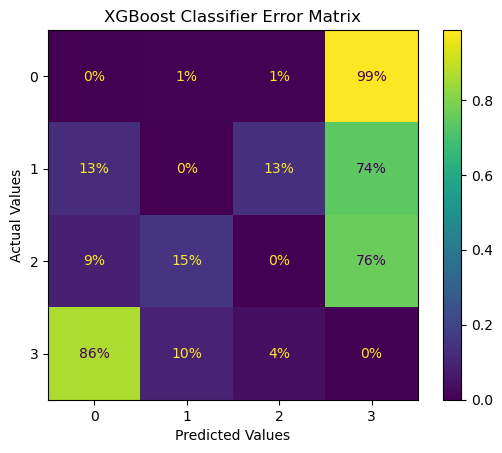

In [87]:
from sklearn.metrics import ConfusionMatrixDisplay
sample_weight = (test_xgb != y_test)
ConfusionMatrixDisplay.from_predictions(y_test, test_xgb, sample_weight=sample_weight, normalize="true", values_format=".0%")
plt.title('XGBoost Classifier Error Matrix')
plt.ylabel('Actual Values')
plt.xlabel('Predicted Values')
# Save the plot as a PDF
plt.savefig('XGBoost Classifier Error Matrix.pdf', format='pdf')
plt.show()

In [88]:
xgb_feature_optuna = best_model_xgb.feature_importances_
xgb_features_optuna = xgb_feature_optuna.tolist()

## Gradient Boosting Classifier

In [89]:
def objective(trial_gbc):
    
    # Random state
    random_state = trial_gbc.suggest_int(name="random_state", low=0, high=100, step=1)
    
    params_gbc = {
        "random_state": random_state
    }
    
    model_gbc = GradientBoostingClassifier(**params_gbc)
    model_gbc.fit(X_train, y_train)
    predictions_gbc = model_gbc.predict(X_test)
    # Calculate the accuracy of the model
    accuracy = accuracy_score(y_test, predictions_gbc)
    return accuracy

study_gbc = optuna.create_study(direction='maximize')
study_gbc.optimize(objective, n_trials=30)

print('Gradient Boosting Classifier Best hyperparameters:', study_gbc.best_params)
print('Gradient Boosting Classifier Best Accuracy:', study_gbc.best_value)

[I 2024-06-29 16:35:36,721] A new study created in memory with name: no-name-4718e2a9-1f03-4fda-a7f1-65a0ffef20a4
[I 2024-06-29 16:38:36,295] Trial 0 finished with value: 0.9406322222990041 and parameters: {'random_state': 81}. Best is trial 0 with value: 0.9406322222990041.
[I 2024-06-29 16:41:31,320] Trial 1 finished with value: 0.9406322222990041 and parameters: {'random_state': 5}. Best is trial 0 with value: 0.9406322222990041.
[I 2024-06-29 16:44:24,444] Trial 2 finished with value: 0.9406322222990041 and parameters: {'random_state': 6}. Best is trial 0 with value: 0.9406322222990041.
[I 2024-06-29 16:47:21,911] Trial 3 finished with value: 0.9406322222990041 and parameters: {'random_state': 86}. Best is trial 0 with value: 0.9406322222990041.
[I 2024-06-29 16:50:14,527] Trial 4 finished with value: 0.9406322222990041 and parameters: {'random_state': 75}. Best is trial 0 with value: 0.9406322222990041.
[I 2024-06-29 16:53:06,133] Trial 5 finished with value: 0.9406322222990041 an

Gradient Boosting Classifier Best hyperparameters: {'random_state': 81}
Gradient Boosting Classifier Best Accuracy: 0.9406322222990041


In [90]:
# Initialize and start the timer for model training
start_time = time.time()

best_model_gbc = GradientBoostingClassifier(**study_gbc.best_params)
best_model_gbc.fit(X_train, y_train)

# Calculate the model training time
training_time_gbc_optuna = time.time() - start_time

train_gbc = best_model_gbc.predict(X_train)

# Initialize and start the timer for model training
start_time = time.time()

test_gbc = best_model_gbc.predict(X_test)

# Calculate the model execution time
execution_time_gbc_optuna = ( time.time() - start_time ) / 130239

In [91]:
gbc_feature_optuna = best_model_gbc.feature_importances_
gbc_features_optuna = gbc_feature_optuna.tolist()

## Stacking

In [92]:
base_predictions_train_optuna = pd.DataFrame( {
    'LGBM Classifier': train_lgbm.ravel(),
        'Random Forest Classifier': train_rf.ravel(),
     'XGB Classifier': train_xgb.ravel(),
     'Gradient Boosting Classifier': train_gbc.ravel(),
    })
base_predictions_train_optuna.head(5)

,LGBM Classifier,Random Forest Classifier,XGB Classifier,Gradient Boosting Classifier
0,1,1,1,1
1,0,0,0,0
2,2,2,2,2
3,1,1,1,1
4,0,0,0,0


In [93]:
train_lgbm=train_lgbm.reshape(-1, 1)
train_rf=train_rf.reshape(-1, 1)
train_xgb=train_xgb.reshape(-1, 1)
train_gbc=train_gbc.reshape(-1, 1)
test_lgbm=test_lgbm.reshape(-1, 1)
test_rf=test_rf.reshape(-1, 1)
test_xgb=test_xgb.reshape(-1, 1)
test_gbc=test_gbc.reshape(-1, 1)

In [94]:
train_x = np.concatenate(( train_lgbm, train_rf, train_xgb, train_gbc), axis=1)
test_x = np.concatenate(( test_lgbm, test_rf, test_xgb, test_gbc), axis=1)

In [95]:
from sklearn.metrics import precision_recall_fscore_support
import seaborn as sns

# Initialize and start the timer for model training
start_time = time.time()

stk_optuna = xgb.XGBClassifier().fit(train_x, y_train)

# Calculate the model training time
training_time_stk_optuna = time.time() - start_time

# Initialize and start the timer for model execution
start_time = time.time()

predict_y=stk_optuna.predict(test_x)

# Calculate the model execution time
execution_time_stk_optuna = ( time.time() - start_time ) / 130239

y_true=y_test
stk_score=accuracy_score(y_true,predict_y)
print('Accuracy of Stacking: '+ str(stk_score))
precision,recall,fscore,none= precision_recall_fscore_support(y_true, predict_y, average='weighted') 
print('Precision of Stacking: '+(str(precision)))
print('Recall of Stacking: '+(str(recall)))
print('F1-score of Stacking: '+(str(fscore)))
print(classification_report(y_true,predict_y))

Accuracy of Stacking: 0.9680894355761331
Precision of Stacking: 0.967679179733223
Recall of Stacking: 0.9680894355761331
F1-score of Stacking: 0.9677816651620386
              precision    recall  f1-score   support

           0       0.98      0.99      0.98     85621
           1       0.99      0.99      0.99     19292
           2       0.98      0.95      0.96      6504
           3       0.91      0.87      0.89     18822

    accuracy                           0.97    130239
   macro avg       0.96      0.95      0.96    130239
weighted avg       0.97      0.97      0.97    130239



In [96]:
stk_feature_optuna = stk_optuna.feature_importances_
stk_features_optuna = stk_feature_optuna.tolist()

## Performance Metrics

In [97]:
from sklearn.metrics import classification_report, precision_score, recall_score, f1_score, accuracy_score

# Assuming you have imported the classifiers and defined their predictions
classifiers_optuna = [test_ada, test_sgd, test_et, test_lgbm, test_rf, test_xgb, test_gbc, predict_y]
model_names = ['Ada Boost', 'SGD', 'Extra Trees', 'LGBM', 'Random Forest', 'XGB', 'Gradient Boosting', 'Stacking']

# Create a dictionary to map model names to their respective predictions
classifier_map_optuna = dict(zip(model_names, classifiers_optuna))

# Now you can use this dictionary to iterate over each model name and its predictions
for model_name, y_pred in classifier_map_optuna.items():
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    f1score = f1_score(y_test, y_pred, average='weighted')
    class_report = classification_report(y_test, y_pred)

    print(f"\nMetrics for Model '{model_name}':")
    print(f"Accuracy: {accuracy}")
    print(f"Precision: {precision}")
    print(f"Recall: {recall}")
    print(f"F1-score: {f1score}")
    print(f"Classification Report:\n{class_report}")



Metrics for Model 'Ada Boost':
Accuracy: 0.401331398429042
Precision: 0.8055236785474722
Recall: 0.401331398429042
F1-score: 0.4043541883037669
Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.19      0.31     85621
           1       0.93      0.81      0.87     19292
           2       0.46      0.76      0.58      6504
           3       0.18      0.83      0.30     18822

    accuracy                           0.40    130239
   macro avg       0.63      0.65      0.51    130239
weighted avg       0.81      0.40      0.40    130239


Metrics for Model 'SGD':
Accuracy: 0.8652784496195456
Precision: 0.8565689762211532
Recall: 0.8652784496195456
F1-score: 0.8507872281355353
Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.97      0.93     85621
           1       0.82      0.93      0.87     19292
           2       0.85      0.65      0.74      6504
           3    

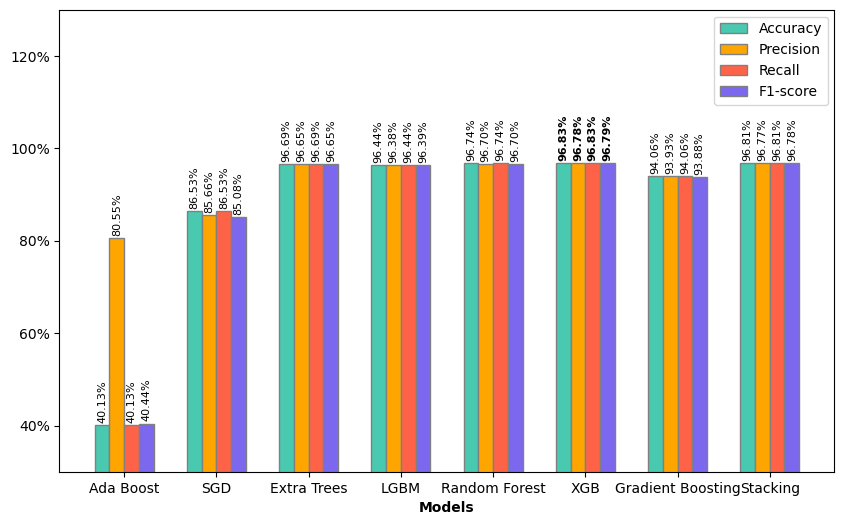

In [98]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import PercentFormatter

# Initialize data for the bar chart
models = list(classifier_map_optuna.keys())
metrics = ['Accuracy', 'Precision', 'Recall', 'F1-score']

# Calculate metric scores for each model
metric_scores = {}
for metric in metrics:
    metric_scores[metric] = [accuracy_score(y_test, classifier_map_optuna[model_name]) if metric == 'Accuracy'
                             else precision_score(y_test, classifier_map_optuna[model_name], average='weighted') if metric == 'Precision'
                             else recall_score(y_test, classifier_map_optuna[model_name], average='weighted') if metric == 'Recall'
                             else f1_score(y_test, classifier_map_optuna[model_name], average='weighted') for model_name in models]

# Set width of bars
bar_width = 0.16

# Set position of bars on X axis
r1 = np.arange(len(models))
r2 = [x + bar_width for x in r1]
r3 = [x + bar_width for x in r2]
r4 = [x + bar_width for x in r3]

plt.figure(figsize=(10, 6))

# Define light colors
colors = ['#48C9B0', '#FFA500', '#FF6347', '#7B68EE']

# Plotting the bars
bars = []
bars.append(plt.bar(r1, metric_scores['Accuracy'], color=colors[0], width=bar_width, edgecolor='grey', label='Accuracy'))
bars.append(plt.bar(r2, metric_scores['Precision'], color=colors[1], width=bar_width, edgecolor='grey', label='Precision'))
bars.append(plt.bar(r3, metric_scores['Recall'], color=colors[2], width=bar_width, edgecolor='grey', label='Recall'))
bars.append(plt.bar(r4, metric_scores['F1-score'], color=colors[3], width=bar_width, edgecolor='grey', label='F1-score'))

# Adding labels on top of each bar with percentage format
for i, container in enumerate(bars):
   for j, bar in enumerate(container):
       yval = bar.get_height()
       if yval == max(metric_scores[metrics[i]]):
           plt.text(bar.get_x() + bar.get_width()/2.0, yval + 0.005, f'{yval*100:.2f}%', va='bottom', ha='center', rotation=90, fontsize=8, weight='bold')
       else:
           plt.text(bar.get_x() + bar.get_width()/2.0, yval + 0.005, f'{yval*100:.2f}%', va='bottom', ha='center', rotation=90, fontsize=8)

# Add xticks on the middle of the group bars
plt.xlabel('Models', fontweight='bold')
plt.xticks([r + bar_width*1.5 for r in range(len(models))], models)

# Set y-axis as percentage and its limits
plt.gca().yaxis.set_major_formatter(PercentFormatter(xmax=1))
plt.ylim(0.3, 1.3)  # Keep the original scale but now interpreted as percentages

# Add a legend and show the plot
plt.legend()
# Save the plot as a PDF
plt.savefig('Model Performance Comparison After Optuna.pdf', format='pdf')
plt.show()

# Training Time Comparision - Optuna

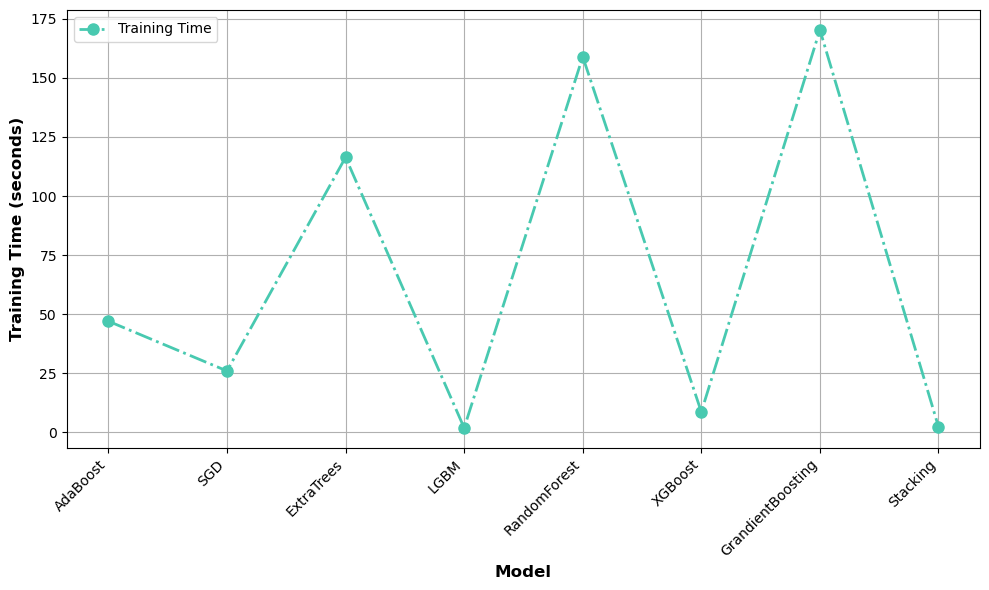

In [99]:
import numpy as np
import matplotlib.pyplot as plt

# Assuming you have imported the classifiers and defined their training times
training_times_optuna = [training_time_ada_optuna, training_time_sgd_optuna, training_time_et_optuna, training_time_lgbm, training_time_rf_optuna, training_time_xgb_optuna, training_time_gbc_optuna, training_time_stk_optuna]

# Initialize data for the line plot
training_models_optuna = ['AdaBoost', 'SGD', 'ExtraTrees', 'LGBM', 'RandomForest', 'XGBoost', 'GrandientBoosting', 'Stacking']  # Assuming these are your model names

# Set figure size
plt.figure(figsize=(10, 6))

# Define line colors and styles
colors = ['#48C9B0', '#FFA500', '#FF6347', '#7B68EE', '#8A2BE2']
linestyles = ['-', '--', ':', '-.', '-']

plt.plot(training_models_optuna, training_times_optuna, color=colors[0], linestyle=linestyles[i], linewidth=2, marker='o', markersize=8, label='Training Time')

# Add grid and axis labels
plt.grid(True)
plt.xlabel('Model', fontweight='bold', fontsize=12)
plt.ylabel('Training Time (seconds)', fontweight='bold', fontsize=12)

# Set x-axis tick labels
plt.xticks(x, training_models_optuna, rotation=45, ha='right', fontsize=10)

# Add a legend
plt.legend(loc='upper left', fontsize=10)

# Adjust the layout
plt.tight_layout()

# Save the plot as a PDF
plt.savefig('Model Training Time Comparison After Optuna.pdf', format='pdf')
plt.show()

# Final Training Time Comparision

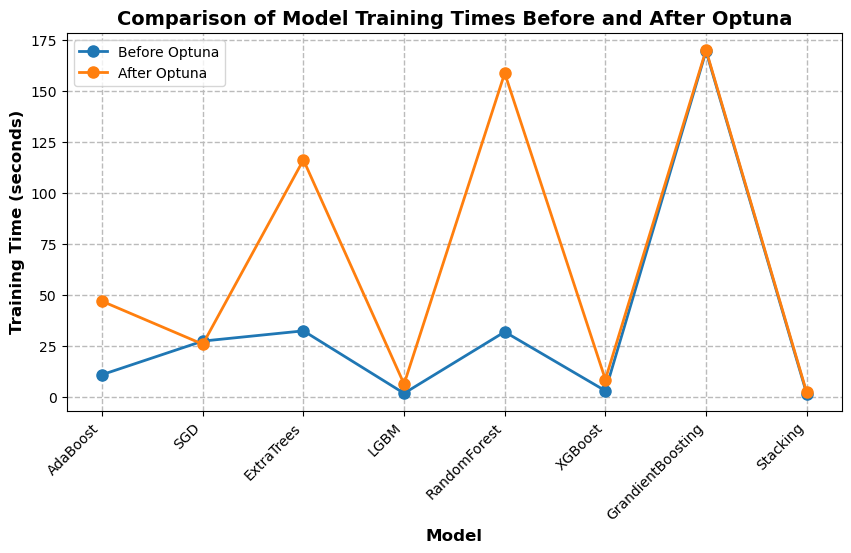

In [107]:
import numpy as np
import matplotlib.pyplot as plt

# Assuming you have imported the classifiers and defined their training times
training_times = [training_time_ada, training_time_sgd, training_time_et, training_time_lgbm, training_time_rf, training_time_xgb, training_time_gbc, training_time_stk]
training_times_optuna = [training_time_ada_optuna, training_time_sgd_optuna, training_time_et_optuna, training_time_lgbm_optuna, training_time_rf_optuna, training_time_xgb_optuna, training_time_gbc_optuna, training_time_stk_optuna]

# Transpose the training_times lists to make them 2D arrays
training_times = np.array(training_times).T
training_times_optuna = np.array(training_times_optuna).T

# Initialize data for the line plot
training_models = ['AdaBoost', 'SGD', 'ExtraTrees', 'LGBM', 'RandomForest', 'XGBoost', 'GrandientBoosting', 'Stacking']  # Assuming these are your model names

# Define line colors and styles
colors = ['#48C9B0', '#FFA500']
linestyles = ['-', '--']

# Plot the training times before and after Optuna
x = np.arange(len(training_models))

# Set up the figure and axis
fig, ax = plt.subplots(figsize=(10, 6))

# Define the line properties
line_width = 2
marker_size = 8
marker_style = 'o'

# Plot the line graphs
ax.plot(x, training_times, linewidth=line_width, marker=marker_style, markersize=marker_size, color='#1f77b4', label='Before Optuna')
ax.plot(x, training_times_optuna, linewidth=line_width, marker=marker_style, markersize=marker_size, color='#ff7f0e', label='After Optuna')

# Add axis labels and title
ax.set_xlabel('Model', fontweight='bold', fontsize=12)
ax.set_ylabel('Execution Time (seconds)', fontweight='bold', fontsize=12)
ax.set_title('Comparison of Model Training Times Before and After Optuna', fontweight='bold', fontsize=14)

# Add grid and axis labels
plt.grid(True)
plt.xlabel('Model', fontweight='bold', fontsize=12)
plt.ylabel('Training Time (seconds)', fontweight='bold', fontsize=12)

# Customize the x-axis ticks and labels
ax.set_xticks(x)
ax.set_xticklabels(training_models, rotation=45, ha='right', fontsize=10)

# Add grid lines
ax.grid(True, linestyle='--', linewidth=1, color='#BBBBBB')

# Adjust the spacing between subplots
plt.subplots_adjust(bottom=0.2)

# Add a legend
legend_font = font_manager.FontProperties(size=10)
ax.legend(loc='upper left', prop=legend_font)

plt.subplots_adjust(bottom=0.25)  # Increase the bottom margin

# Save the plot as a PDF
plt.savefig('Model Training Time Comparison Before and After Optuna.pdf', format='pdf')
plt.show()

In [109]:
training_times

array([ 11.05656886,  27.52455044,  32.5428369 ,   1.90125155,
        32.05410933,   3.13499856, 169.71386409,   1.748492  ])

In [110]:
training_times_optuna

array([ 47.05373311,  25.99650311, 116.39966917,   6.45510936,
       158.96204567,   8.66799974, 170.31503582,   2.35199976])

# Execution Time Comparision - Optuna

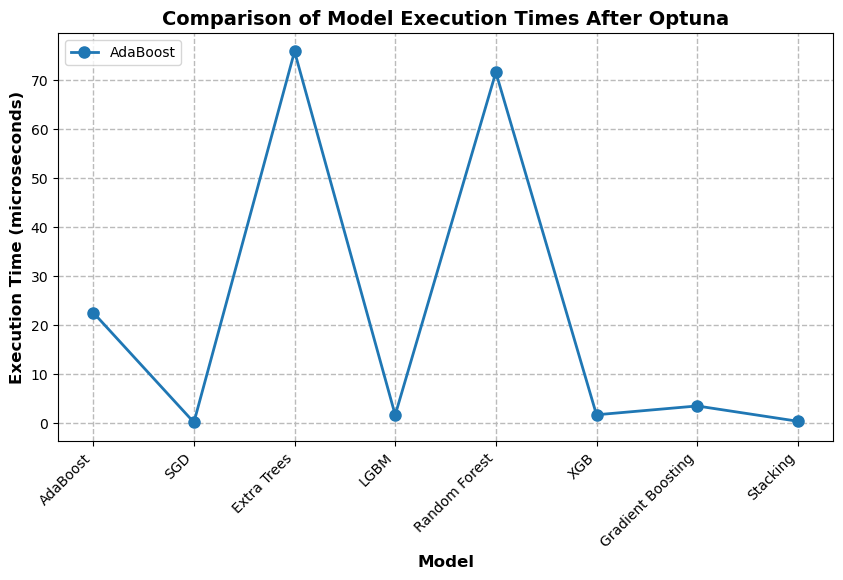

In [101]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.font_manager as font_manager

# Assuming you have imported the classifiers and defined their predicting times
execution_times_optuna = [execution_time_ada_optuna * 1_000_000,
                   execution_time_sgd_optuna * 1_000_000,
                   execution_time_et_optuna * 1_000_000,
                   execution_time_lgbm * 1_000_000,
                   execution_time_rf_optuna * 1_000_000,
                   execution_time_xgb_optuna * 1_000_000,
                   execution_time_gbc_optuna * 1_000_000,
                   execution_time_stk_optuna * 1_000_000]
model_names = ['AdaBoost', 'SGD', 'Extra Trees', 'LGBM', 'Random Forest', 'XGB', 'Gradient Boosting', 'Stacking']

execution_time = ['Execution Time']

# Initialize data for the line plot
x = np.arange(len(model_names))

# Set up the figure and axis
fig, ax = plt.subplots(figsize=(10, 6))

# Define the line properties
line_width = 2
marker_size = 8
marker_style = 'o'

# Plot the line graph
ax.plot(x, execution_times_optuna, linewidth=line_width, marker=marker_style, markersize=marker_size, color='#1f77b4')

# Add axis labels and title
ax.set_xlabel('Model', fontweight='bold', fontsize=12)
ax.set_ylabel('Execution Time (microseconds)', fontweight='bold', fontsize=12)
ax.set_title('Comparison of Model Execution Times After Optuna', fontweight='bold', fontsize=14)

# Customize the x-axis ticks and labels
ax.set_xticks(x)
ax.set_xticklabels(model_names, rotation=45, ha='right', fontsize=10)

# Add grid lines
ax.grid(True, linestyle='--', linewidth=1, color='#BBBBBB')

# Adjust the spacing between subplots
plt.subplots_adjust(bottom=0.2)

# Add a legend
legend_font = font_manager.FontProperties(size=10)
ax.legend(model_names, loc='upper left', prop=legend_font)

# Save the plot as a PDF
plt.savefig('Model Execution Time Comparison After Optuna.pdf', format='pdf')
plt.show()

# Execution time comparision final

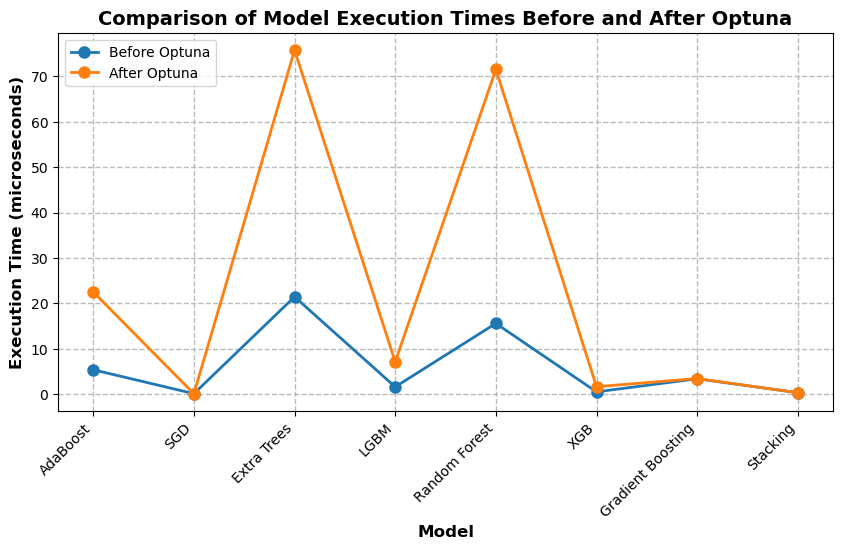

In [108]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.font_manager as font_manager

# Assuming you have imported the classifiers and defined their predicting times
execution_times = [execution_time_ada * 1_000_000,
                   execution_time_sgd * 1_000_000,
                   execution_time_et * 1_000_000,
                   execution_time_lgbm * 1_000_000,
                   execution_time_rf * 1_000_000,
                   execution_time_xgb * 1_000_000,
                   execution_time_gbc * 1_000_000,
                   execution_time_stk * 1_000_000]

execution_times_optuna = [execution_time_ada_optuna * 1_000_000,
                         execution_time_sgd_optuna * 1_000_000,
                         execution_time_et_optuna * 1_000_000,
                         execution_time_lgbm_optuna * 1_000_000,
                         execution_time_rf_optuna * 1_000_000,
                         execution_time_xgb_optuna * 1_000_000,
                         execution_time_gbc_optuna * 1_000_000,
                         execution_time_stk_optuna * 1_000_000]

model_names = ['AdaBoost', 'SGD', 'Extra Trees', 'LGBM', 'Random Forest', 'XGB', 'Gradient Boosting', 'Stacking']

# Initialize data for the line plots
x = np.arange(len(model_names))

# Set up the figure and axis
fig, ax = plt.subplots(figsize=(10, 6))

# Define the line properties
line_width = 2
marker_size = 8
marker_style = 'o'

# Plot the line graphs
ax.plot(x, execution_times, linewidth=line_width, marker=marker_style, markersize=marker_size, color='#1f77b4', label='Before Optuna')
ax.plot(x, execution_times_optuna, linewidth=line_width, marker=marker_style, markersize=marker_size, color='#ff7f0e', label='After Optuna')

# Add axis labels and title
ax.set_xlabel('Model', fontweight='bold', fontsize=12)
ax.set_ylabel('Execution Time (microseconds)', fontweight='bold', fontsize=12)
ax.set_title('Comparison of Model Execution Times Before and After Optuna', fontweight='bold', fontsize=14)

# Customize the x-axis ticks and labels
ax.set_xticks(x)
ax.set_xticklabels(model_names, rotation=45, ha='right', fontsize=10)

# Add grid lines
ax.grid(True, linestyle='--', linewidth=1, color='#BBBBBB')

# Adjust the spacing between subplots
plt.subplots_adjust(bottom=0.2)

# Add a legend
legend_font = font_manager.FontProperties(size=10)
ax.legend(loc='upper left', prop=legend_font)

plt.subplots_adjust(bottom=0.25)  # Increase the bottom margin

# Save the plot as a PDF
plt.savefig('Model Execution Time Comparison Before and After Optuna.pdf', format='pdf')
plt.show()

In [111]:
execution_times

[5.391157032508204,
 0.1261665743109183,
 21.454911538843746,
 1.6200908483127805,
 15.59376754141552,
 0.5221158008178414,
 3.4080517057794424,
 0.3455503298535004]

In [112]:
execution_times_optuna

[22.505989672515454,
 0.11401123401166557,
 75.77332146986649,
 7.117682164004545,
 71.52647805849703,
 1.658491838291308,
 3.460154912947715,
 0.33784157413058574]

# Plotting ensemble Feature Importance

In [103]:
cols = X_train.columns
# Create a dataframe with features
feature_dataframe_optuna = pd.DataFrame( {'features': cols,
    'Random Forest feature importances': rf_features,

    })

# feature_dataframe['LGBM feature importances'] = feature_dataframe['LGBM feature importances'].astype(float)

print(feature_dataframe_optuna.dtypes)

import numpy as np

feature_dataframe_optuna['mean'] = feature_dataframe_optuna.select_dtypes(include='number').mean(axis=1) # axis = 1 computes the mean row-wise

# feature_dataframe['mean'] = feature_dataframe.mean(axis= 1) # axis = 1 computes the mean row-wise

feature_dataframe_optuna.head(4)

features                              object
Random Forest feature importances    float64
dtype: object


,features,Random Forest feature importances,mean
0,use_of_ip,0.003810,0.003810
1,abnormal_url,0.073444,0.073444
2,count.,0.051019,0.051019
3,count-www,0.127803,0.127803


C:\Users\wku\AppData\Local\Temp\ipykernel_19156\1608203773.py:11: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  s.set_xticklabels(s.get_xticklabels(), rotation=90)


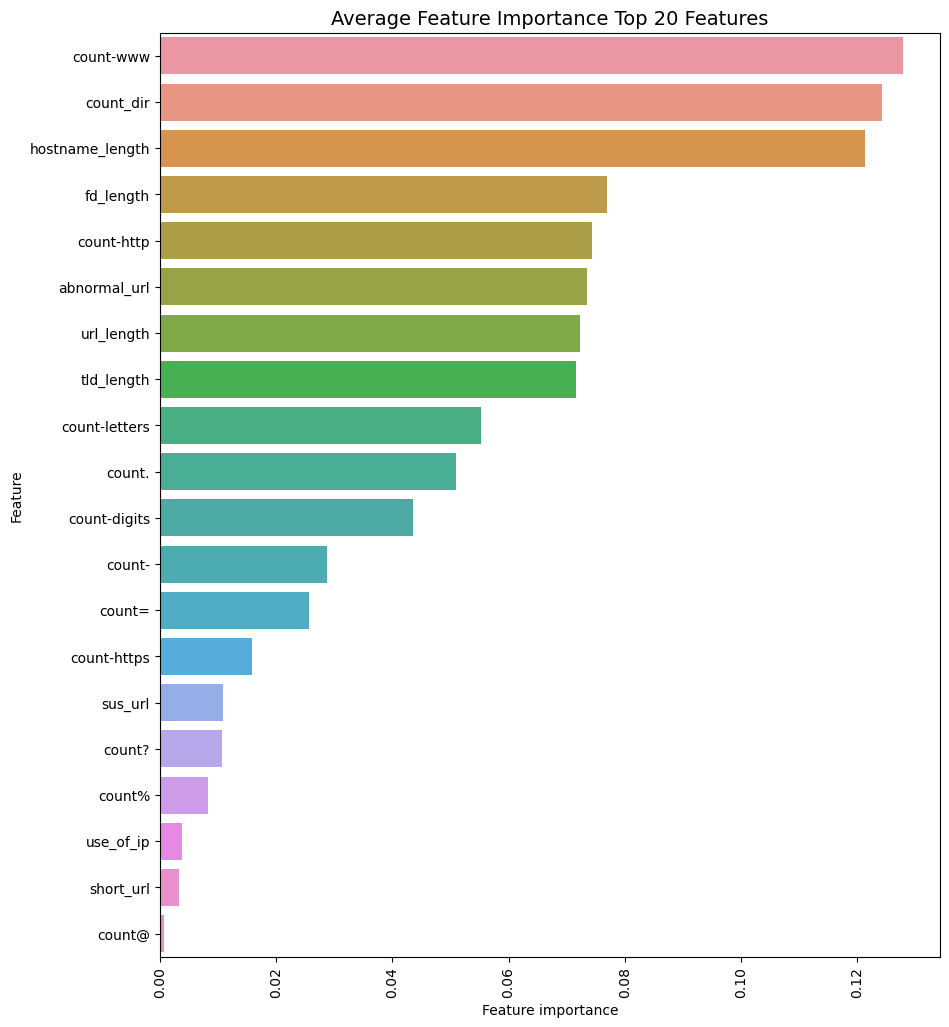

In [106]:
import seaborn as sns
import matplotlib.pyplot as plt

def plot_feature_importance_optuna():
    tmp_optuna = pd.DataFrame({'Feature': X_test.columns, 'Feature importance': feature_dataframe_optuna['mean'].values})
    tmp_optuna = tmp_optuna.sort_values(by='Feature importance',ascending=False).head(20)

    plt.figure(figsize=(12, 12))  # Adjust the figure size
    plt.title('Average Feature Importance Top 20 Features', fontsize=14)
    s = sns.barplot(y='Feature', x='Feature importance', data=tmp_optuna, orient='h')
    s.set_xticklabels(s.get_xticklabels(), rotation=90)

    plt.subplots_adjust(left=0.25)  # Increase the left margin
    plt.savefig('Average Feature Importance Top 20 Features After Optuna.pdf', format='pdf', dpi=300)  # Increase the DPI
    plt.show()

plot_feature_importance_optuna()